## <font color='purple'> DATA 240: Assignment No. 1 </purple>

<font color='blue'>SJSU ID: 016978741 </br>
Name: Eshita Gupta</br>
Subject: Data 240 - Data Mining (HW 1)</font>

#### <font color='purple'> Please download used_cars_data.csv. This is a dataset consisting of used car sales prices. 

In [1]:
# Import Libraries 

import itertools
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import skew, kurtosis, stats
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Supressing warnings to avoid unnecessary errors in the log
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
# Read CSV
used_cars = pd.read_csv('used_cars_data.csv')

In [4]:
used_cars.head(4)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00


### <font color='purple'> 1. DATA CLEANING

#### <font color='purple'> Please remove the following columns: ‘S.No’ and ‘New_Price’. 

<font color='blue'> S.No has no significance in the dataset, its not related to any of the column. We already have auto sequencing of numbers when the rows of datasets are called. Hence, we can remove column S.No.

<font color='blue'> New_Price we can remove as we have another Price column which has values, whereas, new_Price column has mostly null values

In [5]:
used_cars = used_cars.drop(columns = ['S.No.','New_Price'])

In [6]:
used_cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


#### <font color='purple'> Please create ‘Car_Age’ feature which is defined as the difference between the current year and the year the car was built. E.g. “Car_Age” for the first record is 14.

In [7]:
current_year = datetime.now().year

In [8]:
used_cars['Car_Age'] = current_year - used_cars['Year']

In [9]:
used_cars.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9


<font color='blue'> There are two records for Electric vehicles. The corresponding mileage columns are empty. Please search internet what will be the reasonable value and fill out it. Please provide the logics with the reference. 

In [10]:
used_cars['Transmission'].value_counts()

Transmission
Manual       5204
Automatic    2049
Name: count, dtype: int64

In [11]:
used_cars['Fuel_Type'].value_counts()

Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64

In [12]:
used_cars.loc[used_cars['Fuel_Type'] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00,8
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75,13


#### <font color='blue'> Logic Explanation:

<font color='blue'> **Battery Capacity** : The total amount of energy the battery can store in full charge.It is measured in KWh. So if an EV has a battery capacity of let's say 25 KWh, it means the battery can suppy 25 KW of power in one hour, 2.5 KW of power in 10 hours and so on.

<font color='blue'> On internet (links referred), it is given the range of these vehicle on full charge. By dividing the range of the vehicle with its battery capacity we get vehicle km's per KWh. Now, the price of energy and fuel is checked for the particular city for which the car data was given (Chennai and Mumbai here). We got fuel price per litre and the price of 1 KWh energy in that city. 

<font color='blue'>Now, by dividing price of fuel per litre with price of 1 KWh of energy we get the amount of energy(KWh) we can purchase in the amount of fuel per litre.We get KWh as compared to fuel. 

<font color='blue'><b>Example: If fuel is 100 Rs/L and Electricity is 5 Rs/KWh, then with 100 Rupees we can get 20 KWh of electricity.

<font color='blue'>We have how many Kms car can be driven with 1 KWh, and we have the total Kwh we can purchase for the price of 1 litre of fuel. By multiplying these, we get mileage of car in km/litre

<font color='blue'><b> The calculation is shown as below:

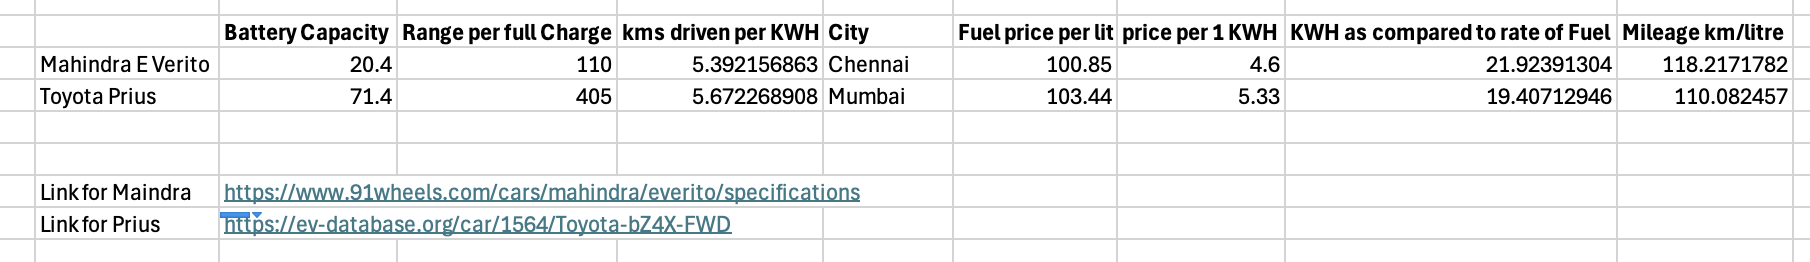

<font color='blue'>**References**:

Mahindra - https://www.91wheels.com/cars/mahindra/everito/specifications

Toyota Prius - https://ev-database.org/car/1564/Toyota-bZ4X-FWD

<font color='blue'><b>Note</b>: We were not able to find the exact model for Toyota Prius Electric that was available in India during the period given in the model name. So we have taken a generic Prius Electric model and used the stats from that for our calculations

In [13]:
## Filling manually these calculated values of Mileage in the rows

#Mahindra E Verito D4
used_cars.iloc[4446, used_cars.columns.get_loc('Mileage')] = '118.22 kmpl'

#Toyota Prius
used_cars.iloc[4904, used_cars.columns.get_loc('Mileage')] = '110.08 kmpl'

In [14]:
used_cars.loc[used_cars['Fuel_Type'] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,118.22 kmpl,72 CC,41 bhp,5.0,13.00,8
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,110.08 kmpl,1798 CC,73 bhp,5.0,12.75,13


### <font color='purple'>  2. Transformation 

#### <font color='purple'> Among the columns in the dataset, python datatype of the ‘Mileage’, ‘Engine’, ‘Power’ columns are ‘object’.

#### <font color='purple'> Please convert them to numerical datatype. Remove unit and convert string to numerical value (floating point or integer) 

<font color='blue'> Lets find the data type for all fields

In [15]:
used_cars.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
Car_Age                int64
dtype: object

<font color='blue'> Among object datatypes, Name, Location, fuel_type, Transmission, owner_type can be string but here we see that Mileage, Engine, Power are objects but should be numerical data type. Let's convert them

<font color='blue'> We see that for Mileage, Engine and Power the units are given, before deleting those units we need to come up with the uniform unit and perform conversion if necessary. Let's see what all unique units are there for each column mentioned

In [16]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 736.8+ KB


In [17]:
used_cars['Mileage_Unit'] = used_cars['Mileage'].str[-5:] 

unique_units = used_cars['Mileage_Unit'].unique()

print("Unique units in the Mileage column:", unique_units)

Unique units in the Mileage column: ['km/kg' ' kmpl']


In [18]:
used_cars.drop(columns = ['Mileage_Unit'], inplace = True)

In [19]:
used_cars.head(6)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,11
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35,12


<font color='blue'><b>Above, we have seen there are 2 unique units, km/kg and kmpl. To keep the unit consistent we will convert km/kg to kmpl

<font color='blue'> **`Conversion Logic Explanation:`**

<font color='blue'>
- Density of Compressed Natural gas: 0.7 Kg/cubic metre</br>
- Density of LPG has a density of 1.898 Kg/cubic metre</br>
- Density of Petrol: 0.75 Kg/l</br></font>

<font color='blue'> </br>1 KG of CNG/LPG cannot be directly converted to litres of Petrol as they are in different state and have different energy content. A better way to do the conversion is to identify their energy content and use that as a basis.

Energy Content of CNG is 53.6 MJ/Kg </font> - Source: https://en.wikipedia.org/wiki/Energy_density

Energy Content of LPG (Propane) is 49.6 MJ/Kg</font> - Source: https://en.wikipedia.org/wiki/Energy_density

Energy Content of Petrol is 34.2 MJ/L </font> - Source: https://en.wikipedia.org/wiki/Energy_density

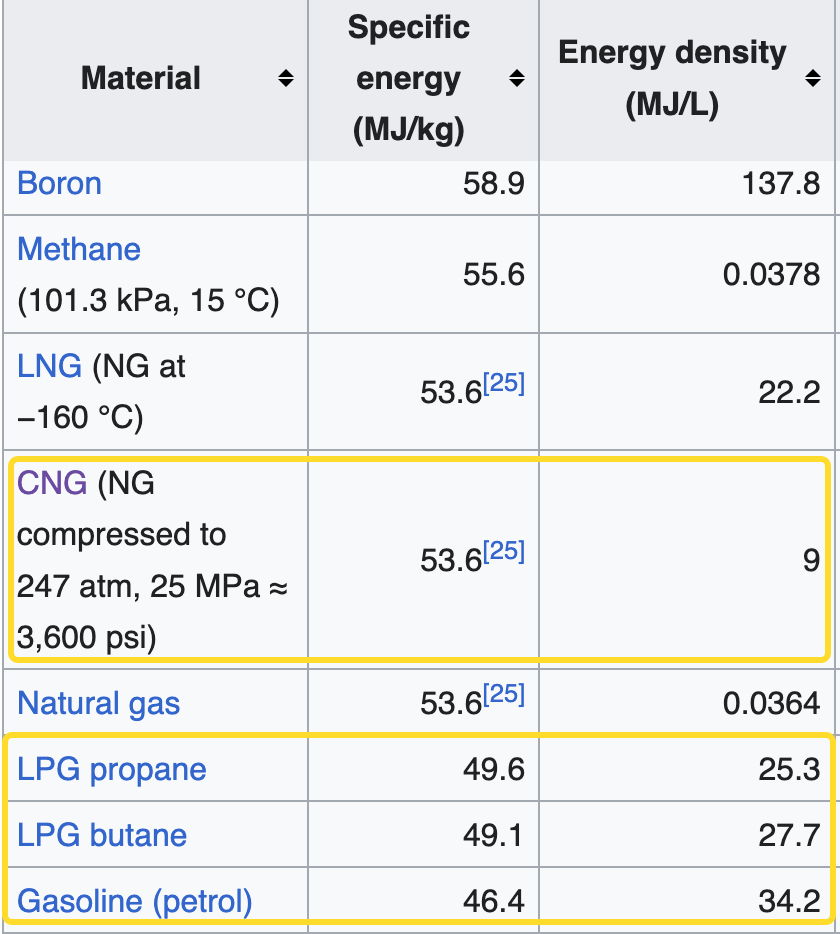

<font color='blue'> So if we divide the energy content of Petrol in MJ/L with energy content of CNG/LPG in MJ/Kg, we can get the ratio of Kg/L. This will represent the energy equivalent of 1 Kg of Gas in terms of 1 litre of Petrol.

<b> CNG: 34.2 MJ/L / 53.6 MJ/Kg = 0.6380 Kg/L (Energy equivalant of 1 Kg of CNG in terms of 1 Litre of petrol) </br>
LPG: 34.2 MJ/L / 49.6 MJ/Kg = 0.6895 Kg/L (Energy equivalant of 1 Kg of LPG in terms of 1 Litre of petrol)

<font color='blue'>So using energy content we get the conversion factor as 0.6380 Kg of Gas per 1 Litre of Petrol for CNG and 0.6895 Kg of LPG per 1 Litre of Petrol.</b>

<font color='blue'>So to get our mileage in Km/L we can multiply our mileage in Km/Kg by our conversion factor in Kg/L.

<font color='blue'> <b>Example:

For CNG</br>
<b>Mileage (Km/Kg): 25.5 Km/Kg -- Original Value </br>
Mileage (Km/L): 25.5 * 0.6380 = 16.269 Km/L  -- Converted Value

For LPG</br>
<b>Mileage (Km/Kg): 25.5 Km/Kg -- Original Value </br>
Mileage (Km/L): 25.5 * 0.6895 = 17.582 Km/L  -- Converted Value

In [20]:
def convert_mileage(mileage, fuel_type):
    if fuel_type == 'LPG':
        conversion_factor = 0.6895
    elif fuel_type == 'CNG':
        conversion_factor = 0.6380
    else:
        return mileage

    if 'km/kg' in mileage:
        value = float(mileage.split()[0])
        converted_value = value * conversion_factor
        return f"{converted_value:.2f} kmpl"
    else:
        return mileage

# Apply the function to the dataset
used_cars['Mileage'] = used_cars.apply(lambda row: convert_mileage(row['Mileage'], row['Fuel_Type']), axis=1)

In [21]:
used_cars.head(6)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,16.97 kmpl,998 CC,58.16 bhp,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,11
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,14.55 kmpl,814 CC,55.2 bhp,5.0,2.35,12


In [22]:
used_cars['Mileage'] = used_cars['Mileage'].str.replace(' kmpl', '').astype(float)

In [23]:
used_cars.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,16.97,998 CC,58.16 bhp,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50,9


In [24]:
used_cars['Mileage'].dtype

dtype('float64')

<font color='blue'> Checking for 'Engine' field. Let's see what different unique units this column has ?

In [25]:
used_cars['Engine_Unit'] = used_cars['Engine'].str[-3:] 

unique_units = used_cars['Engine_Unit'].unique()

print("Unique units in the Engine column:", unique_units)

Unique units in the Engine column: [' CC' nan]


<font color='blue'> This tells there are null values as well and only unit present is in 'CC'

In [26]:
used_cars.drop(columns = ['Engine_Unit'], inplace = True)

In [27]:
used_cars['Engine'].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

<font color='blue'> The above confirms there are no other units, its either CC or the value is missing entirely. So replacing CC to conver the datatype to float.

In [28]:
used_cars['Engine'] = used_cars['Engine'].str.replace(' CC', '').astype(float)

In [29]:
used_cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,16.97,998.0,58.16 bhp,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,17.74,11


In [30]:
used_cars[used_cars['Engine'].isna()].head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,2.95,17
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,NaN,NaN,NaN,2.11,14


In [31]:
used_cars['Engine'].isna().sum()

46

In [32]:
used_cars['Engine'].dtypes

dtype('float64')

<font color='blue'>  We see that Engine column has 46 null values and the datatype has been converted to Float. We will next check for the Power column.

In [33]:
# Now check for 'Power'. Let's see what different unique unit this column has ?

used_cars['Power_Unit'] = used_cars['Power'].str[-5:] 

unique_units = used_cars['Power_Unit'].unique()

print("Unique units in the Power column:", unique_units)

Unique units in the Power column: ['6 bhp' '2 bhp' '7 bhp' '8 bhp' '1 bhp' '5 bhp' '4 bhp' '3 bhp' '0 bhp'
 '9 bhp' 'l bhp' nan]


<font color='blue'> This tells there are null values and "l bhp" tell us that there is string before bhp as well. However, only unit present is in 'bhp'

In [34]:
used_cars.drop(columns = ['Power_Unit'], inplace = True)

In [35]:
# keep all bhp, convert column to numeric datatype
used_cars['Power'] = used_cars['Power'].replace({'null bhp': np.nan, '': np.nan})
used_cars['Power'] = used_cars['Power'].str.replace(' bhp', '').astype(float)

used_cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,16.97,998.0,58.16,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,11


In [36]:
used_cars[used_cars['Power'].isna()].head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8,1399.0,NaN,5.0,2.0,16
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,NaN,5.0,1.3,19


In [37]:
used_cars['Power'].isna().sum()

175

In [38]:
used_cars['Power'].dtypes

dtype('float64')

<font color='blue'>We see that Power column has 175 null values and the datatype has been converted to Float.

### <font color='purple'>  3. Outlier detection and box-plot 

#### <font color='purple'> Please check whether the data is in normal distribution or non-normal distribution for the following numerical columns: ‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’ 

In [39]:
used_cars.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Car_Age                int64
dtype: object

<font color='blue'> ‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’  - These are all continuous features, we should see the distribution of these features.

In [40]:
# some statistics to get the idea of these columns

used_cars.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.00
Mileage,7253.0,18.079704,4.770008,0.00,15.1,18.12,20.92,118.22
Engine,7207.0,1616.573470,595.285137,72.00,1198.0,1493.00,1968.00,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.0,94.00,138.10,616.00
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.00
Car_Age,7253.0,10.634634,3.254421,5.00,8.0,10.00,13.00,28.00


#### <font color='blue'> Column: Car_Age </font>

In [41]:
def plot_normal_distribution(df, column):
   
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    sns.histplot(df[column], kde=True, ax=axs[0])
    axs[0].set_title(f'Histogram with KDE for {column}')
    axs[0].set_xlabel(column)
    axs[0].set_ylabel('Frequency')

    sns.kdeplot(df[column], fill=True, ax=axs[1])
    axs[1].set_title(f'Density Plot for {column}')
    axs[1].set_xlabel(column)
    axs[1].set_ylabel('Density')

    stats.probplot(df[column].dropna(), dist="norm", plot=axs[2])
    axs[2].set_title(f'Q-Q Plot for {column}')

    plt.show()

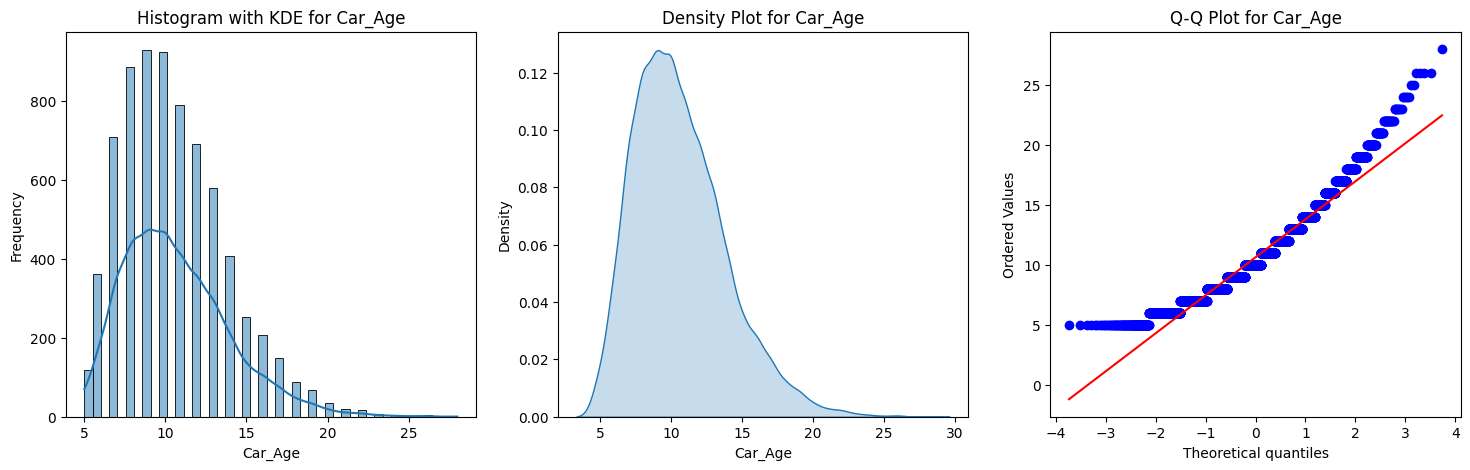

In [42]:
plot_normal_distribution(used_cars, 'Car_Age')

<font color='blue'> **`Explanation :`** From Histogram, the data looks to follow a normal distribution but we can also see it is rightly skewed. For better explainability or visibility to the distribution, we draw Quartile-Quartile plot (Q-Q plot). This compares data to a Normal distribution to check if its normally distributed. If the data is normally distributed, points will fall on the reference line, else will deviate from the line. Here we see that points form a curve which shows that data is skewed.

<font color='blue'> Also, we can use the measure of skeweness and Kurtosis to confirm the normality of the dataset. In this case, the sample size is large more than 300, hence we can consider this metrics:

<font color='black'> <b>Absolute skeweness value between -2 to 2
Absolute kurtosis value between -2 to 2 </b>

<font color='blue'> If the value falls b/w these, we can say it is normally distibuted

In [43]:
def get_skewness_and_kurtosis(df, column):
    col_data = df[column].dropna()
    col_skewness = skew(col_data)
    col_kurtosis = kurtosis(col_data)
    return col_skewness, col_kurtosis

In [44]:
car_age_skewness, car_age_kurtosis = get_skewness_and_kurtosis(used_cars, 'Car_Age')
print(f'Skewness of Car_Age: {car_age_skewness}')
print(f'Kurtosis of Car_Age: {car_age_kurtosis}')

Skewness of Car_Age: 0.8396424577222684
Kurtosis of Car_Age: 0.9090329640528934


<font color='blue'> Skewness in this column is confirmed by the positive value 0.83 (rightly skewed data). Also, we see skewness from mean and median of this column, mean (10.63) is little higher than median 10. Low value of kurtosis (0.9) which is not too far away from normal distribution value of 0. This suggests the data is closer to normal distribution. </b>

<font color='blue'> The stats confirms that it is rightly skewed but to only little extent. It is safe to say that it is right skewed normal distribution

#### <font color='blue'> Column: Kilometers_Driven

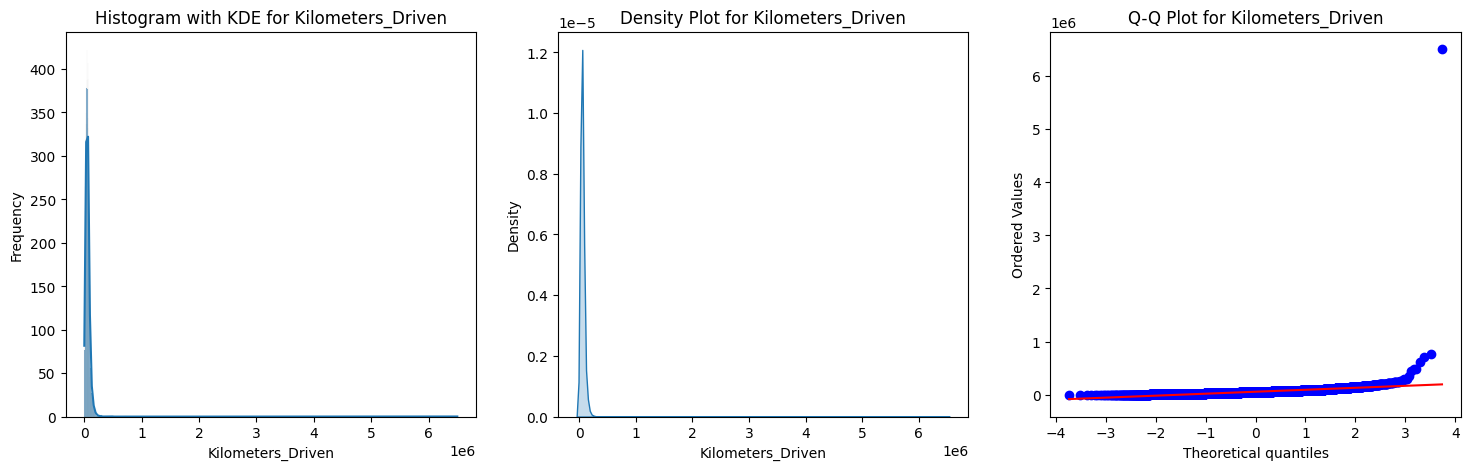

In [45]:
plot_normal_distribution(used_cars, 'Kilometers_Driven')

<font color='blue'> <b>`Explanation:`</b> The plots for Kilometers_driven don't represent normal distribution, same is confirmed by Q-Q plot as well. It is very heavily rightly skewed. The skewness can be based on the fact that this column represents Kilometers driven by different cars. The typical range would be on the lower end as compared to cars with very high mileage on them. 

In [46]:
Kilometers_Driven_skewness, Kilometers_Driven_kurtosis = get_skewness_and_kurtosis(used_cars, 'Kilometers_Driven')
print(f'Skewness of Kilometers_Driven: {Kilometers_Driven_skewness}')
print(f'Kurtosis of Kilometers_Driven: {Kilometers_Driven_kurtosis}')

Skewness of Kilometers_Driven: 61.56983797216221
Kurtosis of Kilometers_Driven: 4671.511206122981


<font color='blue'> From the skewness and kurtosis and mean and median, it is confirmed that the distribtion is not normal. Very high value of Kurtosis suggests that there are too many outliers or heavy tails on the right side, much more extreme than what we would see in a normal distribution

#### <font color='blue'> Column: Mileage </font>

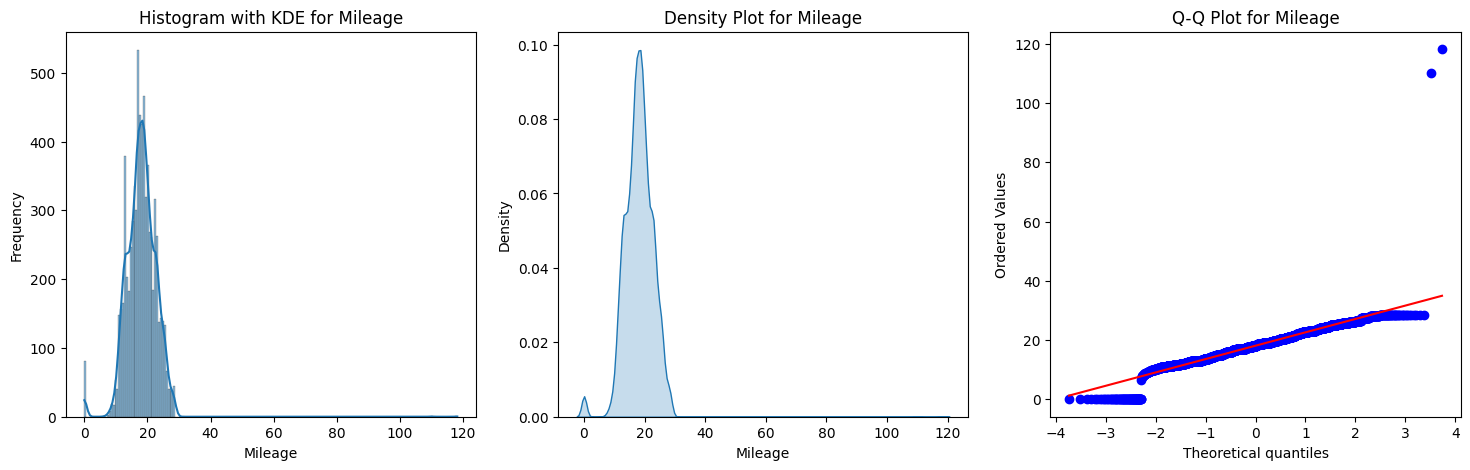

In [47]:
plot_normal_distribution(used_cars, 'Mileage')

<font color='blue'> <b>`Explanation:`</b> The plots clearly represent a non-normal distribution with a long tail extending towards the higher mileage values. The Q-Q plot also has significant deviation from the straight diagonal line that would be expected for a normal distribution.

In [48]:
Mileage_skewness, Mileage_kurtosis = get_skewness_and_kurtosis(used_cars, 'Mileage')
print(f'Skewness of Mileage: {Mileage_skewness}')
print(f'Kurtosis of Mileage: {Mileage_kurtosis}')

Skewness of Mileage: 1.8123105293626525
Kurtosis of Mileage: 46.54804728197903


<font color='blue'> Mean and Median also suggests not very skewed, as the difference between them is low. The same is also suggested by low skewness number. However kurtosis suggests the presence of outliers or heavy tails. It is a symmetric shape, just looks weird compared to normal distribution, with outliers. From stats, we can say it is not normally distributed

#### <font color='blue'>  Column: Engine

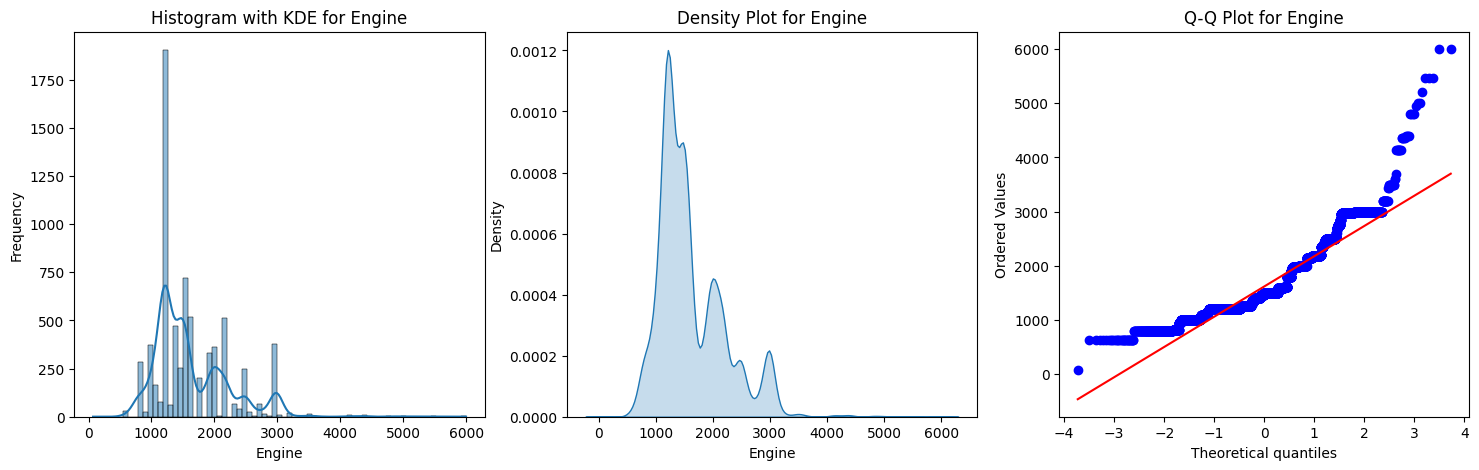

In [49]:
plot_normal_distribution(used_cars, 'Engine')

<font color='blue'> <b>`Explanation:`</b> Plots clearly represent non-normal distributions. The plots presents a multimodal distribution which is not aligned with a normal distribution plot. Non normal distribution is confirmed from Q-Q plot as well.

In [50]:
Engine_skewness, Engine_kurtosis = get_skewness_and_kurtosis(used_cars, 'Engine')
print(f'Skewness of Engine: {Engine_skewness}')
print(f'Kurtosis of Engine: {Engine_kurtosis}')

Skewness of Engine: 1.4121185543364754
Kurtosis of Engine: 3.173880174159258


<font color='blue'> Stats shows the symmetry is not very off as the skeweness number is also low and mean and median doesn't have much diference. Mean is higher than median, suggesting little skewness on the right. Kurtosis is also not very high, tells about presence of not many outliers or heavy tails. This is multimodal normal distribution. Not properly Normal distributed.

#### <font color='blue'>  Column: Power

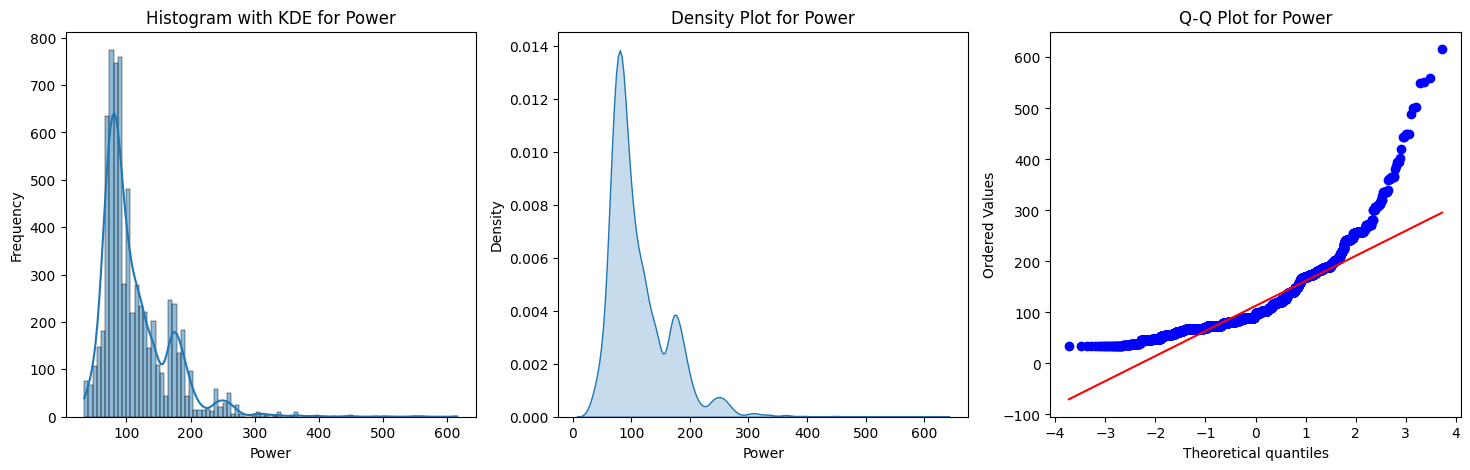

In [51]:
plot_normal_distribution(used_cars, 'Power')

<font color='blue'> <b>`Explanation:`</b> The histogram shows a multimodal distribution with several peaks, which is inconsistent with a normal distribution. The S-shaped curve we see here is indicative of a distribution with heavy tails and skewness.

In [52]:
Power_skewness, Power_kurtosis = get_skewness_and_kurtosis(used_cars, 'Power')
print(f'Skewness of Power: {Power_skewness}')
print(f'Kurtosis of Power: {Power_kurtosis}')

Skewness of Power: 1.9607619851161648
Kurtosis of Power: 7.123825086334245


<font color='blue'>  Stats also confirms that the data is not normally distributed. Presence of outliers is confirmed by kurtosis factor.

#### <font color='blue'>  Column: Seats

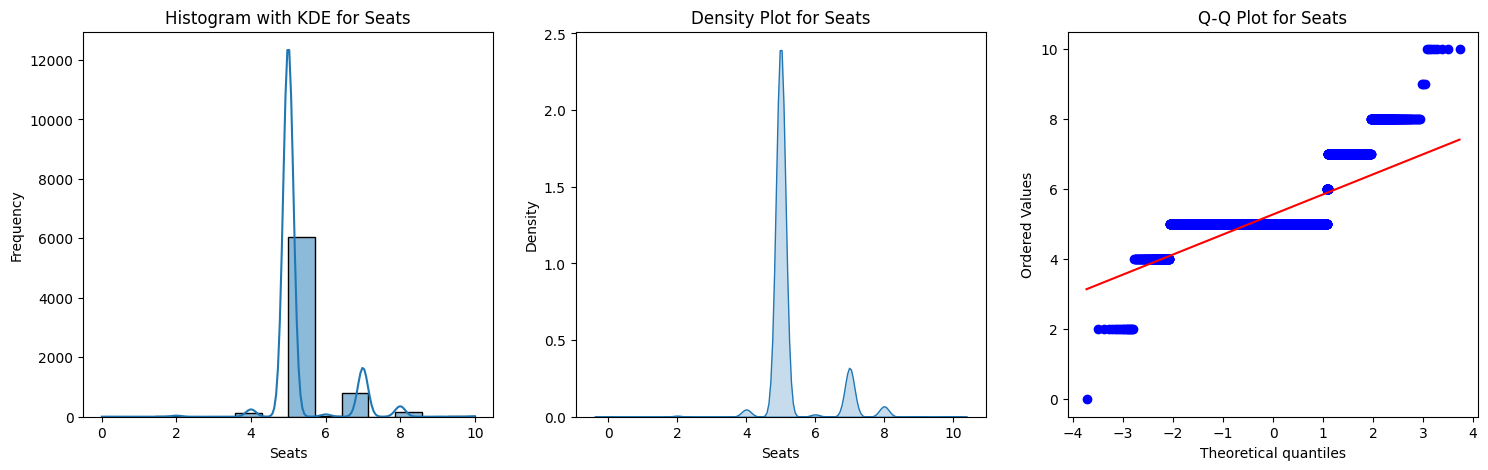

In [53]:
plot_normal_distribution(used_cars, 'Seats')

<font color='blue'> <b>`Explanation:`</b> The plots display discrete, multimodal distributions with multiple peaks. These patterns are inconsistent with a normal distribution, which is represented by a single, symmetric bell-shaped curve.

In [54]:
Seats_skewness, Seats_kurtosis = get_skewness_and_kurtosis(used_cars, 'Seats')
print(f'Skewness of Seats: {Seats_skewness}')
print(f'Kurtosis of Seats: {Seats_kurtosis}')

Skewness of Seats: 1.901865636530442
Kurtosis of Seats: 4.699330036961431


<font color='blue'> Stats confirms the same, based on Kurtosis factor we can confirm presence of outliers

#### <font color='blue'>  Column: Price

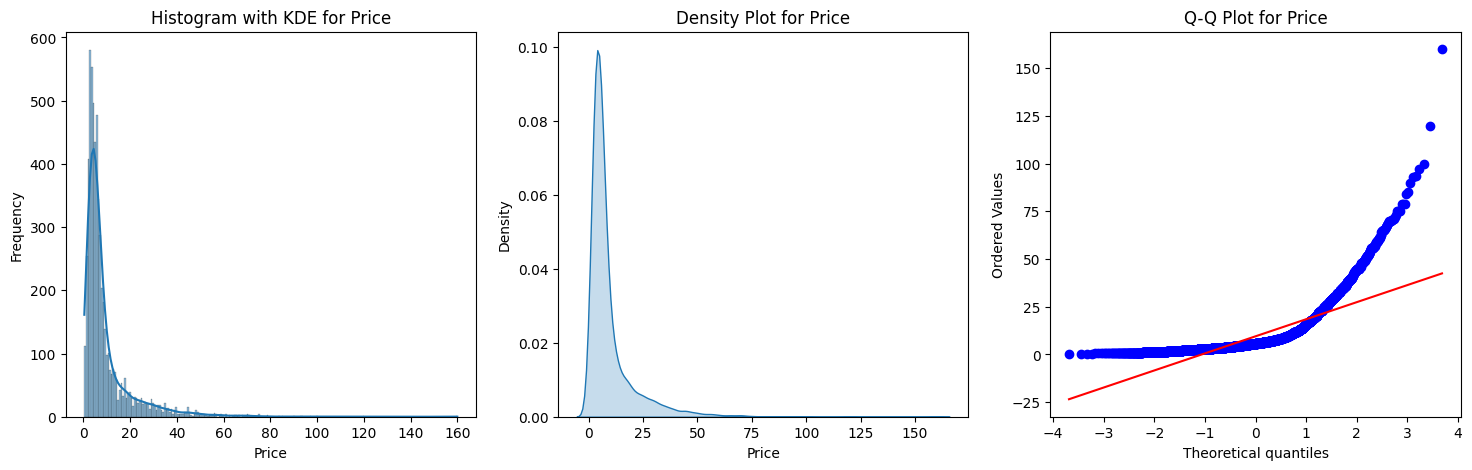

In [55]:
plot_normal_distribution(used_cars, 'Price')

<font color='blue'> <b>`Explanation:`</b> The histogram shows a highly positively skewed distribution for price. There's a very high frequency of lower-priced cars.

In [56]:
Price_skewness, Price_kurtosis = get_skewness_and_kurtosis(used_cars, 'Price')
print(f'Skewness of Price: {Price_skewness}')
print(f'Kurtosis of Price: {Price_kurtosis}')

Skewness of Price: 3.3344007541820284
Kurtosis of Price: 17.077010055238336


<font color='blue'> From stats, it is seen that it is rightly skewed, and the mean median difference also tells the same as mean is higher than median. Kurtosis suggests the presence of outliers on the skewed end. 

<font color='brown'> <b>Note</b>: There are many other hypothesis test we could do to tell if our data is normally distributed like Kolmogorov-Smirnov, Shapiro wilk test etc. In all these, the null hypothesis is always that data is normally distributed, and if you find evidence that doesn't match the normal distribution, we reject the null hypothesis.

<font color='brown'> However, if the datset is larger, i.e more than 1000, these datset will always reject the null hypothesis because there will be enough variations to pull that p- value down and reject the null hypothesis. Therefore, here we have seen that is the distribution sort of close to normal distribution!! </font>

#### <font color='purple'> Please detect outliers based on the data distribution type. For outlier detection, please calculate step by step. Please count(print) how many outliers for each column.

<font color='blue'> <b> Column: </b> Car_Age (We consider it close to normal distribution as discussed above).
Hence for this column, we would calculate outlier considering Normal distribution formula and for others we will use IQR method to detect outliers

In [57]:
def detect_outliers_zscore(df, column, threshold=3):
    mean_col = df[column].mean()
    std_col = df[column].std()
    z_scores = (df[column] - mean_col) / std_col
    outliers = np.where(np.abs(z_scores) > threshold)[0]

    lower_limit = mean_col - threshold * std_col
    upper_limit = mean_col + threshold * std_col
    print(f"{column} - Z-score method: lower limit = {lower_limit:.2f}, upper limit = {upper_limit:.2f}")
    
    return outliers

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index

    print(f"{column} - IQR method: lower limit = {lower_bound:.2f}, upper limit = {upper_bound:.2f}")
    
    return outliers

In [58]:
numerical_columns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

outliers_summary = {}
outlier_indices = set()

for column in numerical_columns:
    if column == 'Car_Age':  # Car_Age is normally distributed
        outliers = detect_outliers_zscore(used_cars, column)
    else: 
        outliers = detect_outliers_iqr(used_cars, column)
    
    outliers_summary[column] = len(outliers)
    outlier_indices.update(outliers)
    print(f'Number of outliers in {column}: {len(outliers)} \n')

print("\nOutliers Summary:")
for column, count in outliers_summary.items():
    print(f"{column}: {count} outliers")

Car_Age - Z-score method: lower limit = 0.87, upper limit = 20.40
Number of outliers in Car_Age: 58 

Kilometers_Driven - IQR method: lower limit = -24500.00, upper limit = 131500.00
Number of outliers in Kilometers_Driven: 258 

Mileage - IQR method: lower limit = 6.37, upper limit = 29.65
Number of outliers in Mileage: 83 

Engine - IQR method: lower limit = 43.00, upper limit = 3123.00
Number of outliers in Engine: 65 

Power - IQR method: lower limit = -19.65, upper limit = 232.75
Number of outliers in Power: 273 

Seats - IQR method: lower limit = 5.00, upper limit = 5.00
Number of outliers in Seats: 1153 

Price - IQR method: lower limit = -6.17, upper limit = 19.62
Number of outliers in Price: 718 


Outliers Summary:
Car_Age: 58 outliers
Kilometers_Driven: 258 outliers
Mileage: 83 outliers
Engine: 65 outliers
Power: 273 outliers
Seats: 1153 outliers
Price: 718 outliers


#### <font color='purple'> Please draw box-plot for the columns. Please draw box-plot together if the scales of the columns are in similar range. Otherwise, please draw box-plot separately. 

<font color='blue'> To group the columns which have similar scale, we will find the range and group them together.

<font color='blue'> **1.	Group 1**: Smaller Range:
	•	Seats (0-10) - Range = 10
	•	Car_Age (5-28) - Range = 23

<font color='blue'> **2.	Group 2:** Mid-Range Values:
	•	Mileage (0-118.22) Range = 118.22
	•	Power (34.2-616) Range = 581.8


<font color='blue'> **3.	Larger Range Values:** We will plot them seperately as range varies
	•	Kilometers_Driven (171-6500000) Range = 6499829
	•	Engine (72-5998) range = 5951
	•	Price (0.44-160) Range = 160 (this column is in lakhs, however in data values are written only in absolute. therfore to be on safer side we will draw seperately instead of grouping it with Km_driven)

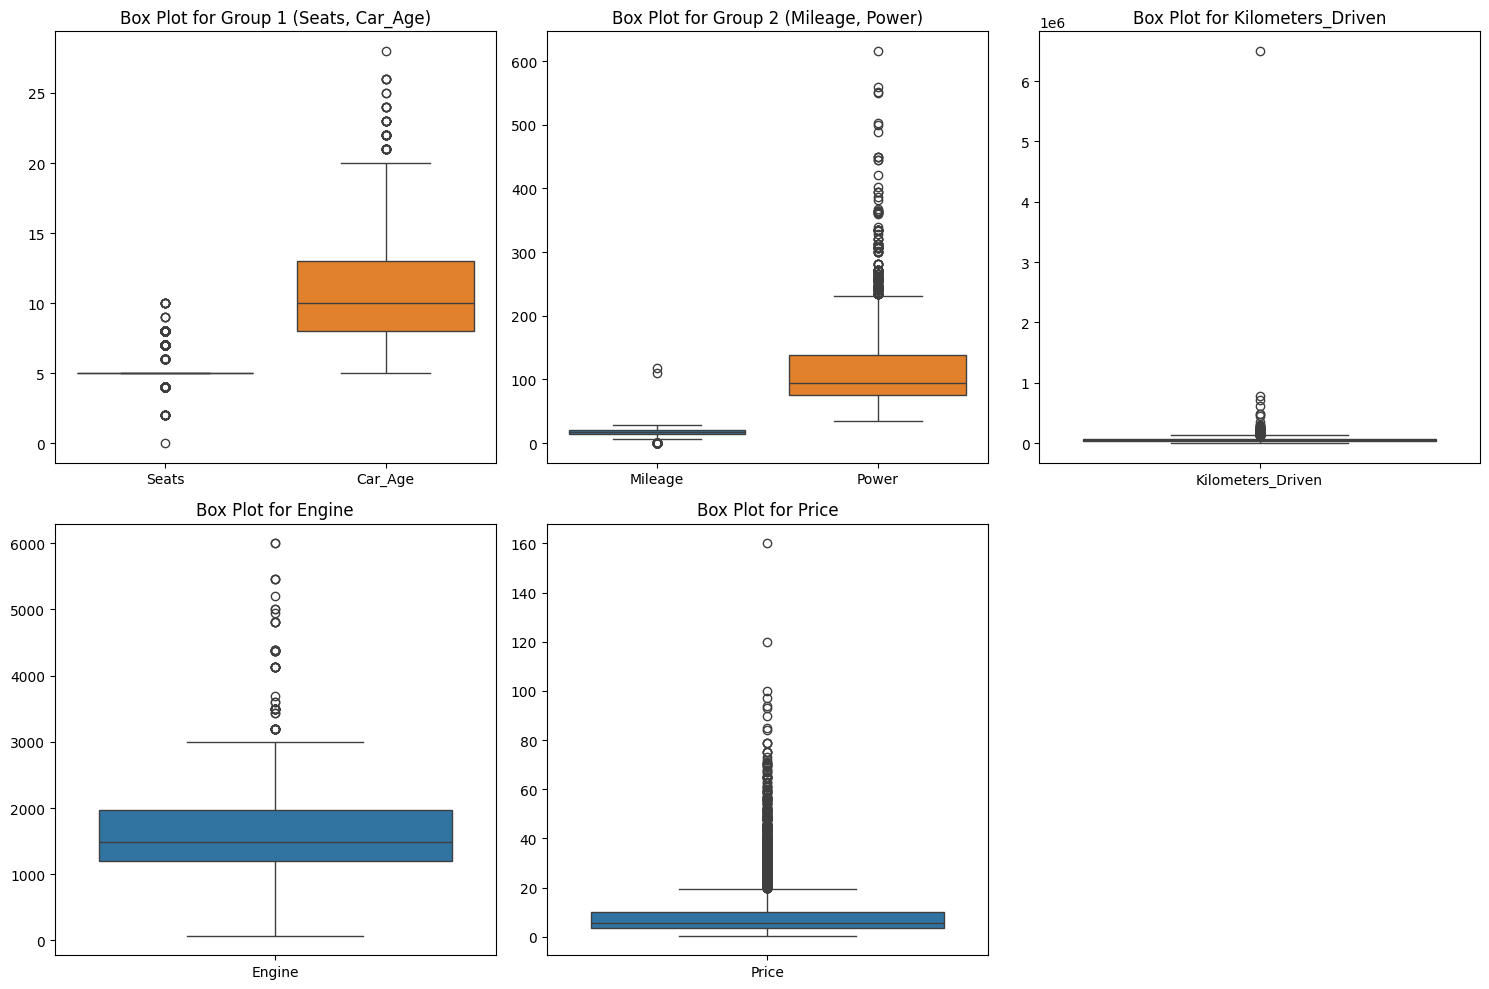

In [59]:
group1 = ['Seats', 'Car_Age']
group2 = ['Mileage', 'Power']
group3 = ['Kilometers_Driven']
group4 = ['Engine']
group5 = ['Price']

def plot_boxplots(columns, ax, title):
    sns.boxplot(data=used_cars[columns], ax=ax)
    ax.set_title(title)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

plot_boxplots(group1, axs[0, 0], 'Box Plot for Group 1 (Seats, Car_Age)')
plot_boxplots(group2, axs[0, 1], 'Box Plot for Group 2 (Mileage, Power)')
plot_boxplots(group3, axs[0, 2], 'Box Plot for Kilometers_Driven')
plot_boxplots(group4, axs[1, 0], 'Box Plot for Engine')
plot_boxplots(group5, axs[1, 1], 'Box Plot for Price')

fig.delaxes(axs[1, 2])

plt.tight_layout()
plt.show()

<font color='blue'> No, grouping them doesn't seem to be intuitive to understand the plots. doing it all seperately for better interpretably

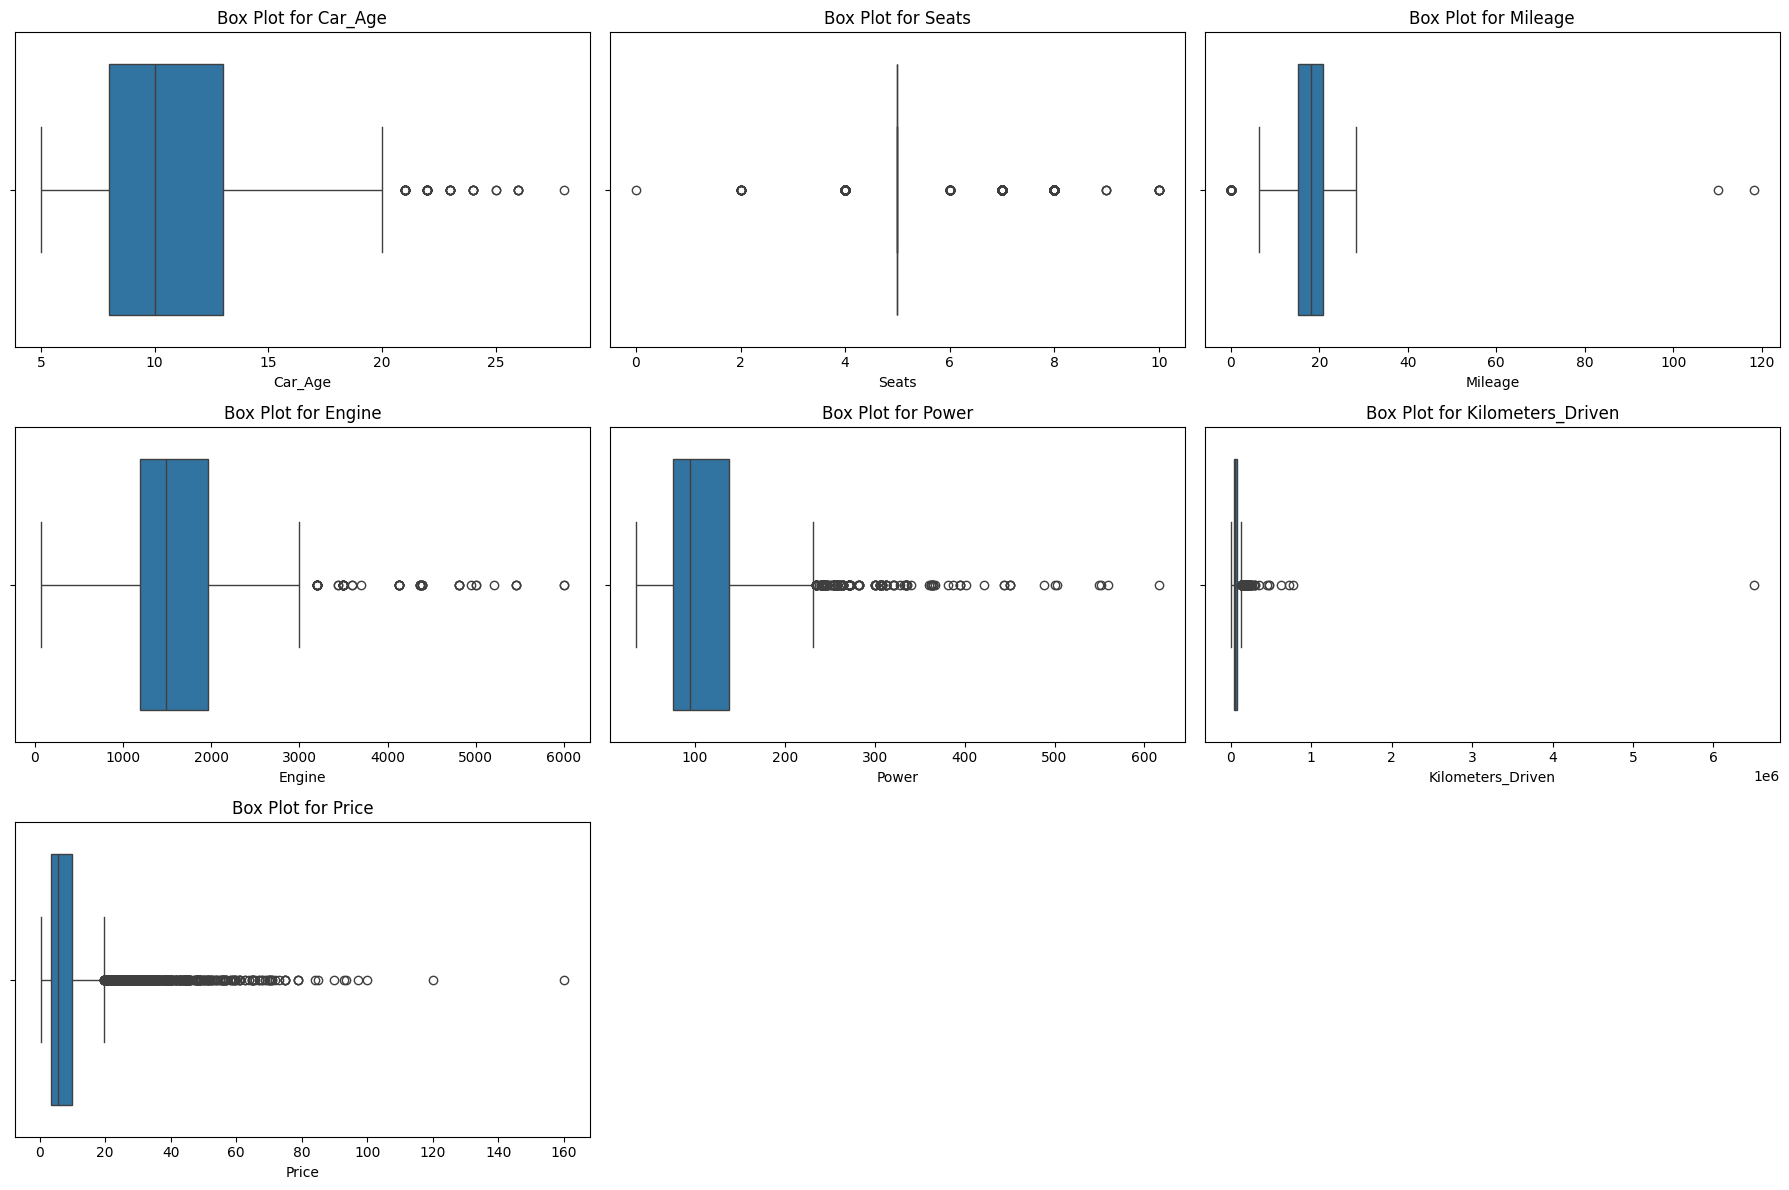

In [60]:
columns = ['Car_Age', 'Seats', 'Mileage', 'Engine', 'Power', 'Kilometers_Driven', 'Price']

n_plots = len(columns)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))

for i, (column, ax) in enumerate(zip(columns, axs.flat)):
    sns.boxplot(x=used_cars[column], ax=ax)
    ax.set_title(f'Box Plot for {column}')

for ax in axs.flat[i+1:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

<font color='blue'> <b>`Explaination on box plots:`</b>

<font color='blue'> <b> Car_Age </b>
The box plot shows a relatively symmetric distribution centered around 10-15 years. Outliers beyond the max limit of 20 years have been detected. 

<font color='blue'> <b> Seats</b>
The Seats box plot has no visible box as IQR limits are both 5. This indicates majority of the cars have a 5 seat configuration. All others will be considered as outliers. 

<font color='blue'> <b> Mileage</b>
The IQR identifies outliers below 6.37 and above 29.65 for this field, with 83 outliers detected. These are visible as points at ends of the whiskers, mainly on the upper end.

<font color='blue'> <b> Engine</b>
The IQR identifies outliers below 43 and above 3123, with 65 outliers detected. These outliers are mostly visible on the right side of the plot, which may be attributed to luxury or high performance cars having larger engine sizes.

<font color='blue'> <b> Power</b>
The IQR identifies outliers below -19.65 and above 232.75, with 273 outliers detected. The negative lower limit suggests data issues or very low-powered vehicles.

<font color='blue'> <b> Kilometers_Driven</b>
This box plot indicates a right-skewed distribution as the box is fully compressed. The IQR method identifies outliers above 131,500 km, with 258 outliers detected. The plot shows a lot of extreme outliers, with some vehicles which have been driven over 6 million kilometers. This seems to be a potential indicator of data issues.

<font color='blue'> <b> Price</b>
The Price box plot indicates a highly right-skewed distribution with a compressed box towards the bottom. The IQR identifies outliers below -6.17 and above 19.62, with 718 outliers detected. The high value outliers represent luxury or high-end vehicles.

### <font color='purple'> 4. Pearson correlation coefficient and scatter plot

#### <font color='purple'> Please calculate Pearson correlation coefficient between two columns for the following columns: ‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’. 

<font color='blue'>  Removing outliers before calculating pearson correlaton coefficient

In [61]:
used_cars_cleaned = used_cars.drop(outlier_indices)

In [62]:
used_cars_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5286.0,2013.389898,3.057365,2004.00,2011.0000,2014.00,2016.00,2019.0
Kilometers_Driven,5286.0,53045.550322,26236.650016,171.00,33281.0000,52000.00,70000.00,131000.0
Mileage,5286.0,19.271481,3.725088,7.58,17.0000,19.00,22.00,28.4
Engine,5255.0,1401.050238,356.061097,793.00,1197.0000,1298.00,1582.00,2997.0
Power,5175.0,97.408768,34.850001,34.20,74.0000,86.80,116.30,231.1
Seats,5250.0,5.000000,0.000000,5.00,5.0000,5.00,5.00,5.0
Price,4318.0,5.704085,3.639760,0.45,3.2125,4.75,6.95,19.5
Car_Age,5286.0,10.610102,3.057365,5.00,8.0000,10.00,13.00,20.0


<font color='blue'> Pearson Corelation coefficient is a corelation coefficient that measures the linear corelation between two sets of data. It is a number between -1 t0 1 indicating the strength of relationship. Close to 1 means strong positive corelation and close to -1 means strong negative corelation. It is calculated by formula

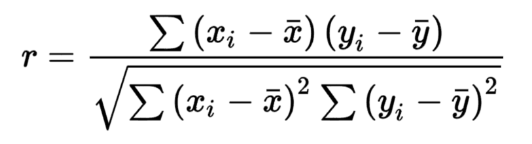

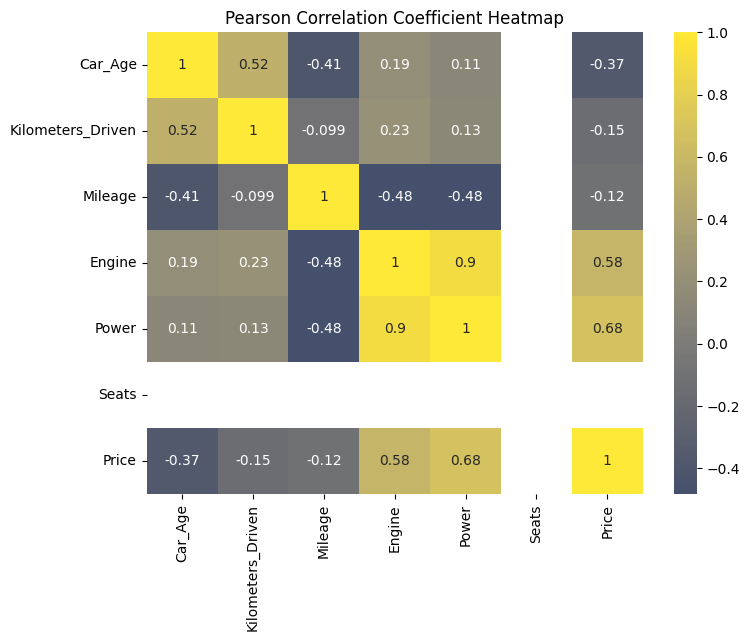

In [63]:
correlation_matrix = used_cars_cleaned[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', center=0)
plt.title('Pearson Correlation Coefficient Heatmap')
plt.show()

<font color='blue'><b>`Explanation:`</b> Following are the observations based on the Correlation matrix above.

<font color='blue'><b> Strong correlations: </b>

- Engine and Power have a good positive correlation (0.9), indicating they increase together. 

<font color='blue'><b> Moderate correlations: </b>

- Car_Age and Kilometers_Driven have a decent positive correlation (0.52), suggesting older cars will have run for more kilometers which is obvious.
- Price has moderate positive correlation with Engine (0.58) and Power (0.68). This suggestes that cars having more powerful engines tend to have higher prices which holds true for Performance and Luxury segment cars.
- Mileage also has moderate negative correlation with Engine (-0.48) and Power (-0.48). This is indicative of lower fuel efficiency and overall mileage for cars having larger and more powerful engines. 

<font color='blue'><b> Weak correlations: </b>

- Kilometers_Driven mostly has weak correlations with all variables except for Car_Age. This evidently means that older cars have more Kms driven.
- For seats, all the values other than 5 were tagged as outliers, so it has no correlations with other fields. Due to this it has this type of appearance in the matrix.

<font color='blue'><b> Negative correlations: </b>

- Car_Age has a moderate negative correlation with Price (-0.37). This suggests that older cars tend to be less expensive.
- Mileage also has a moderate negative correlation with Car_Age (-0.41). This indicates that older cars tend to have slightly lower fuel efficiency.

<font color='blue'> Reviewing the Pearson Coefficient and P-values for all fields </b>

In [64]:
used_cars_cleaned_temp = used_cars_cleaned.dropna()

In [65]:
columns = ['Car_Age', 'Seats', 'Mileage', 'Engine', 'Power', 'Kilometers_Driven', 'Price']

for col1, col2 in itertools.combinations(columns, 2):
    x = used_cars_cleaned_temp[col1]
    y = used_cars_cleaned_temp[col2]
    
    valid_pairs = np.intersect1d(x.index, y.index)
    x_aligned = x.loc[valid_pairs]
    y_aligned = y.loc[valid_pairs]
    
    if len(x_aligned) == 0:
        print(f'{col1} vs. {col2}: Insufficient data')
    else:
        r, p = stats.pearsonr(x_aligned, y_aligned)
        print(f'{col1} vs. {col2}: r = {r:.2f}, p = {p:.15f}')

Car_Age vs. Seats: r = nan, p = nan
Car_Age vs. Mileage: r = -0.41, p = 0.000000000000000
Car_Age vs. Engine: r = 0.24, p = 0.000000000000000
Car_Age vs. Power: r = 0.15, p = 0.000000000000000
Car_Age vs. Kilometers_Driven: r = 0.52, p = 0.000000000000000
Car_Age vs. Price: r = -0.36, p = 0.000000000000000
Seats vs. Mileage: r = nan, p = nan
Seats vs. Engine: r = nan, p = nan
Seats vs. Power: r = nan, p = nan
Seats vs. Kilometers_Driven: r = nan, p = nan
Seats vs. Price: r = nan, p = nan
Mileage vs. Engine: r = -0.48, p = 0.000000000000000
Mileage vs. Power: r = -0.48, p = 0.000000000000000
Mileage vs. Kilometers_Driven: r = -0.09, p = 0.000000000963229
Mileage vs. Price: r = -0.13, p = 0.000000000000000
Engine vs. Power: r = 0.90, p = 0.000000000000000
Engine vs. Kilometers_Driven: r = 0.25, p = 0.000000000000000
Engine vs. Price: r = 0.58, p = 0.000000000000000
Power vs. Kilometers_Driven: r = 0.14, p = 0.000000000000000
Power vs. Price: r = 0.68, p = 0.000000000000000
Kilometers_Dri

<font color='blue'> <b> Almost all correlations have p-values of 0.00, which is extremely low (<= 0.05). This indicates that these correlations are statistically significant, meaning the relationships observed are unlikely to occur by chance. This also confirms our analysis based on the heatmap above. 

<font color='blue'> - Older cars tend to have been driven more (Car_Age vs. Kilometers_Driven: 0.52). </br>
<font color='blue'>- More powerful engines are associated with higher prices (Power vs. Price: 0.68).</br>
<font color='blue'>- Cars with larger engines or more power tend to have lower fuel efficiency (negative correlations with Mileage).</br>
<font color='blue'>- Older cars tend to be slightly less fuel-efficient and less expensive.

In [66]:
def plot_bars(scores, title):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, len(scores)*0.5))
    ax.set_title(title)
    sns.barplot(x=scores.values, y=scores.index, ax=ax, palette='plasma')
    for patch in ax.patches:
        y, height, width = patch.get_y(), patch.get_height(), patch.get_width()
        ax.text(
            width+0.0001, y + height/2, 
            f'{width:.4f}', va='center', ha='left', size=8, 
            bbox={'facecolor': 'white', 'boxstyle': 'round'}
        )

/var/folders/f9/tzl1jwjn3f3fvhyb_dm77j6h0000gn/T/ipykernel_28990/1807184055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores.values, y=scores.index, ax=ax, palette='plasma')


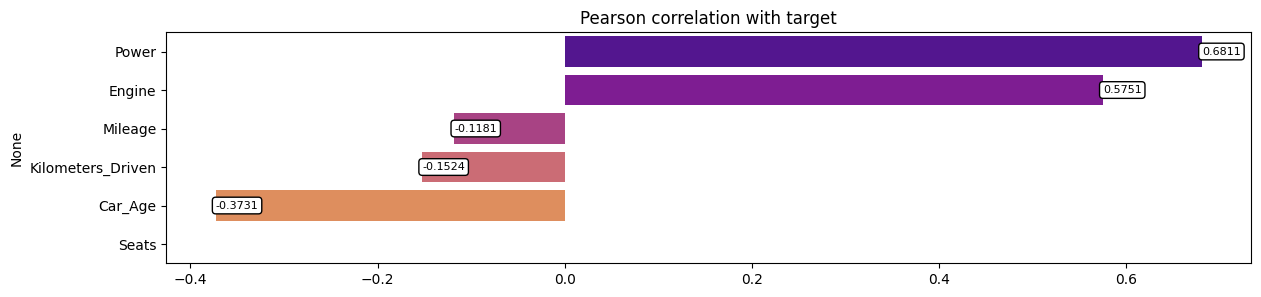

In [67]:
columns = ['Car_Age','Seats', 'Mileage', 'Engine', 'Power', 'Kilometers_Driven']

corr_target = used_cars_cleaned[columns].corrwith(used_cars_cleaned['Price']).sort_values(ascending=False)
plot_bars(corr_target, "Pearson correlation with target")

<font color='blue'><b>`Explanation:`</b> The histogram plot above represents the Pearson Correlation coefficients for the Price feature with respect to the other features. It shows that features Power and Engine have a strong positive correlation with the Price feature, also, the car age has significantly low correlation. 

#### <font color='purple'>Please draw scatterplots between two columns for the following columns: ‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’. Please include the coefficient value inside of the figures. 

<font color='blue'> Creating a scatter plots to show all possible combinations for each field as outlined in the requirement.

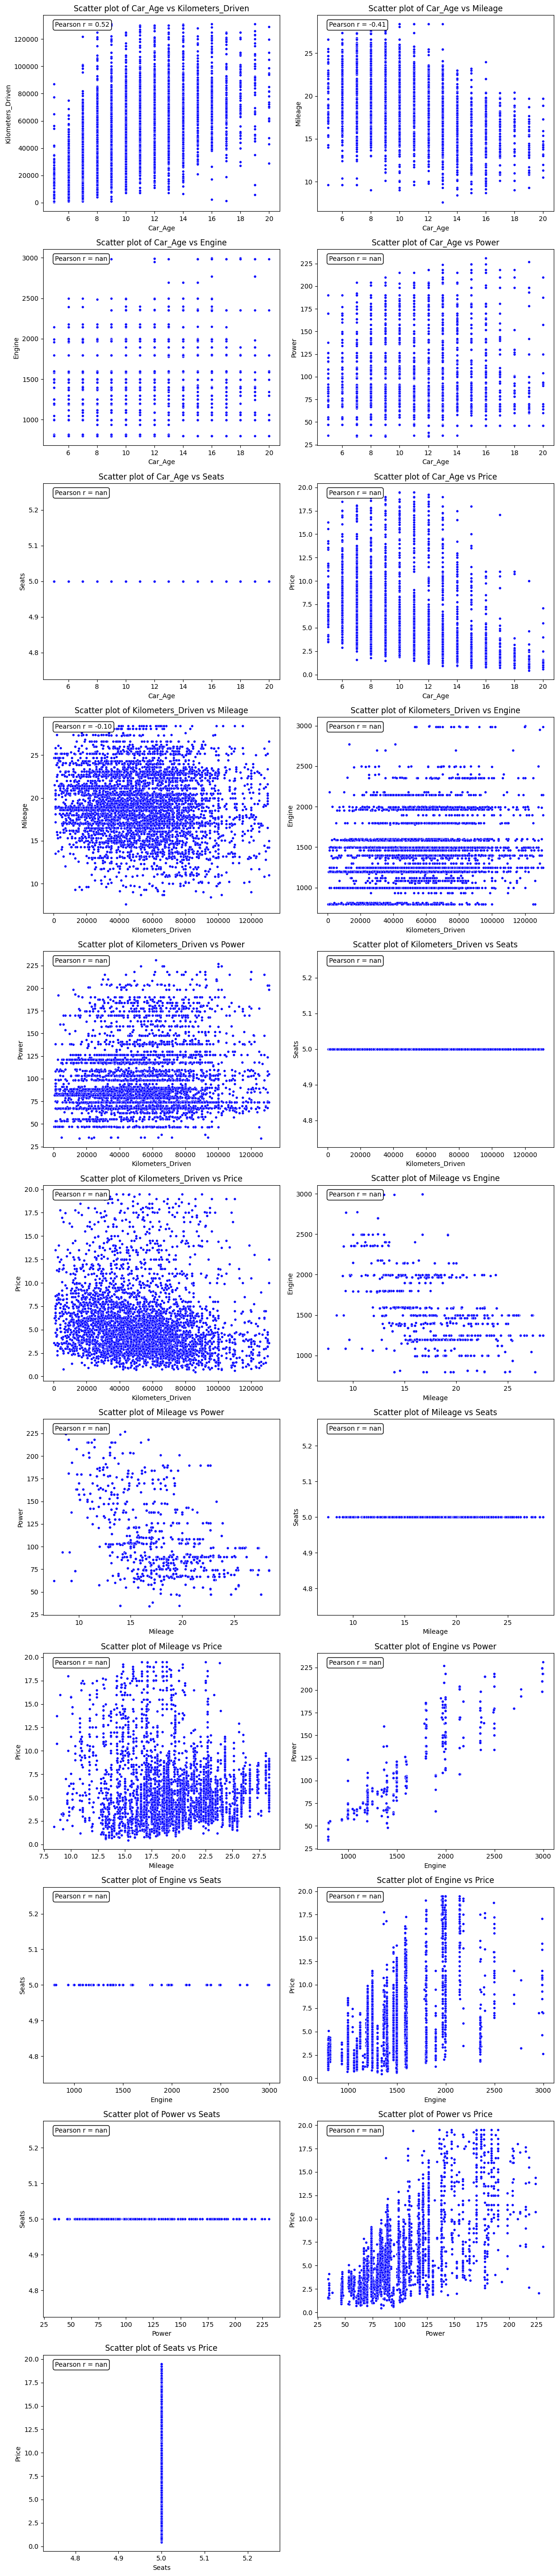

In [68]:
def add_correlation_coefficient(ax, x, y):
    corr = np.corrcoef(x, y)[0, 1]
    ax.annotate(f'Pearson r = {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                fontsize=10, ha='left', va='center',
                bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

numerical_columns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

n_cols = 2
n_rows = (len(numerical_columns) * (len(numerical_columns) - 1) // 2 + n_cols - 1) // n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5))
axs = axs.flatten()

plot_index = 0

for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        col1 = numerical_columns[i]
        col2 = numerical_columns[j]
        
        ax = axs[plot_index]
        sns.scatterplot(x=used_cars_cleaned[col1], y=used_cars_cleaned[col2], ax=ax, s=15, color='blue')
        
        add_correlation_coefficient(ax, used_cars_cleaned[col1], used_cars_cleaned[col2])
        
        ax.set_xlabel(col1)
        ax.set_ylabel(col2)
        ax.set_title(f'Scatter plot of {col1} vs {col2}')
        
        plot_index += 1

for idx in range(plot_index, len(axs)):
    fig.delaxes(axs[idx])

plt.tight_layout()
plt.show()


<font color='blue'> Creating a pairplot to show all possible combinations for each field as outlined in the requirement.

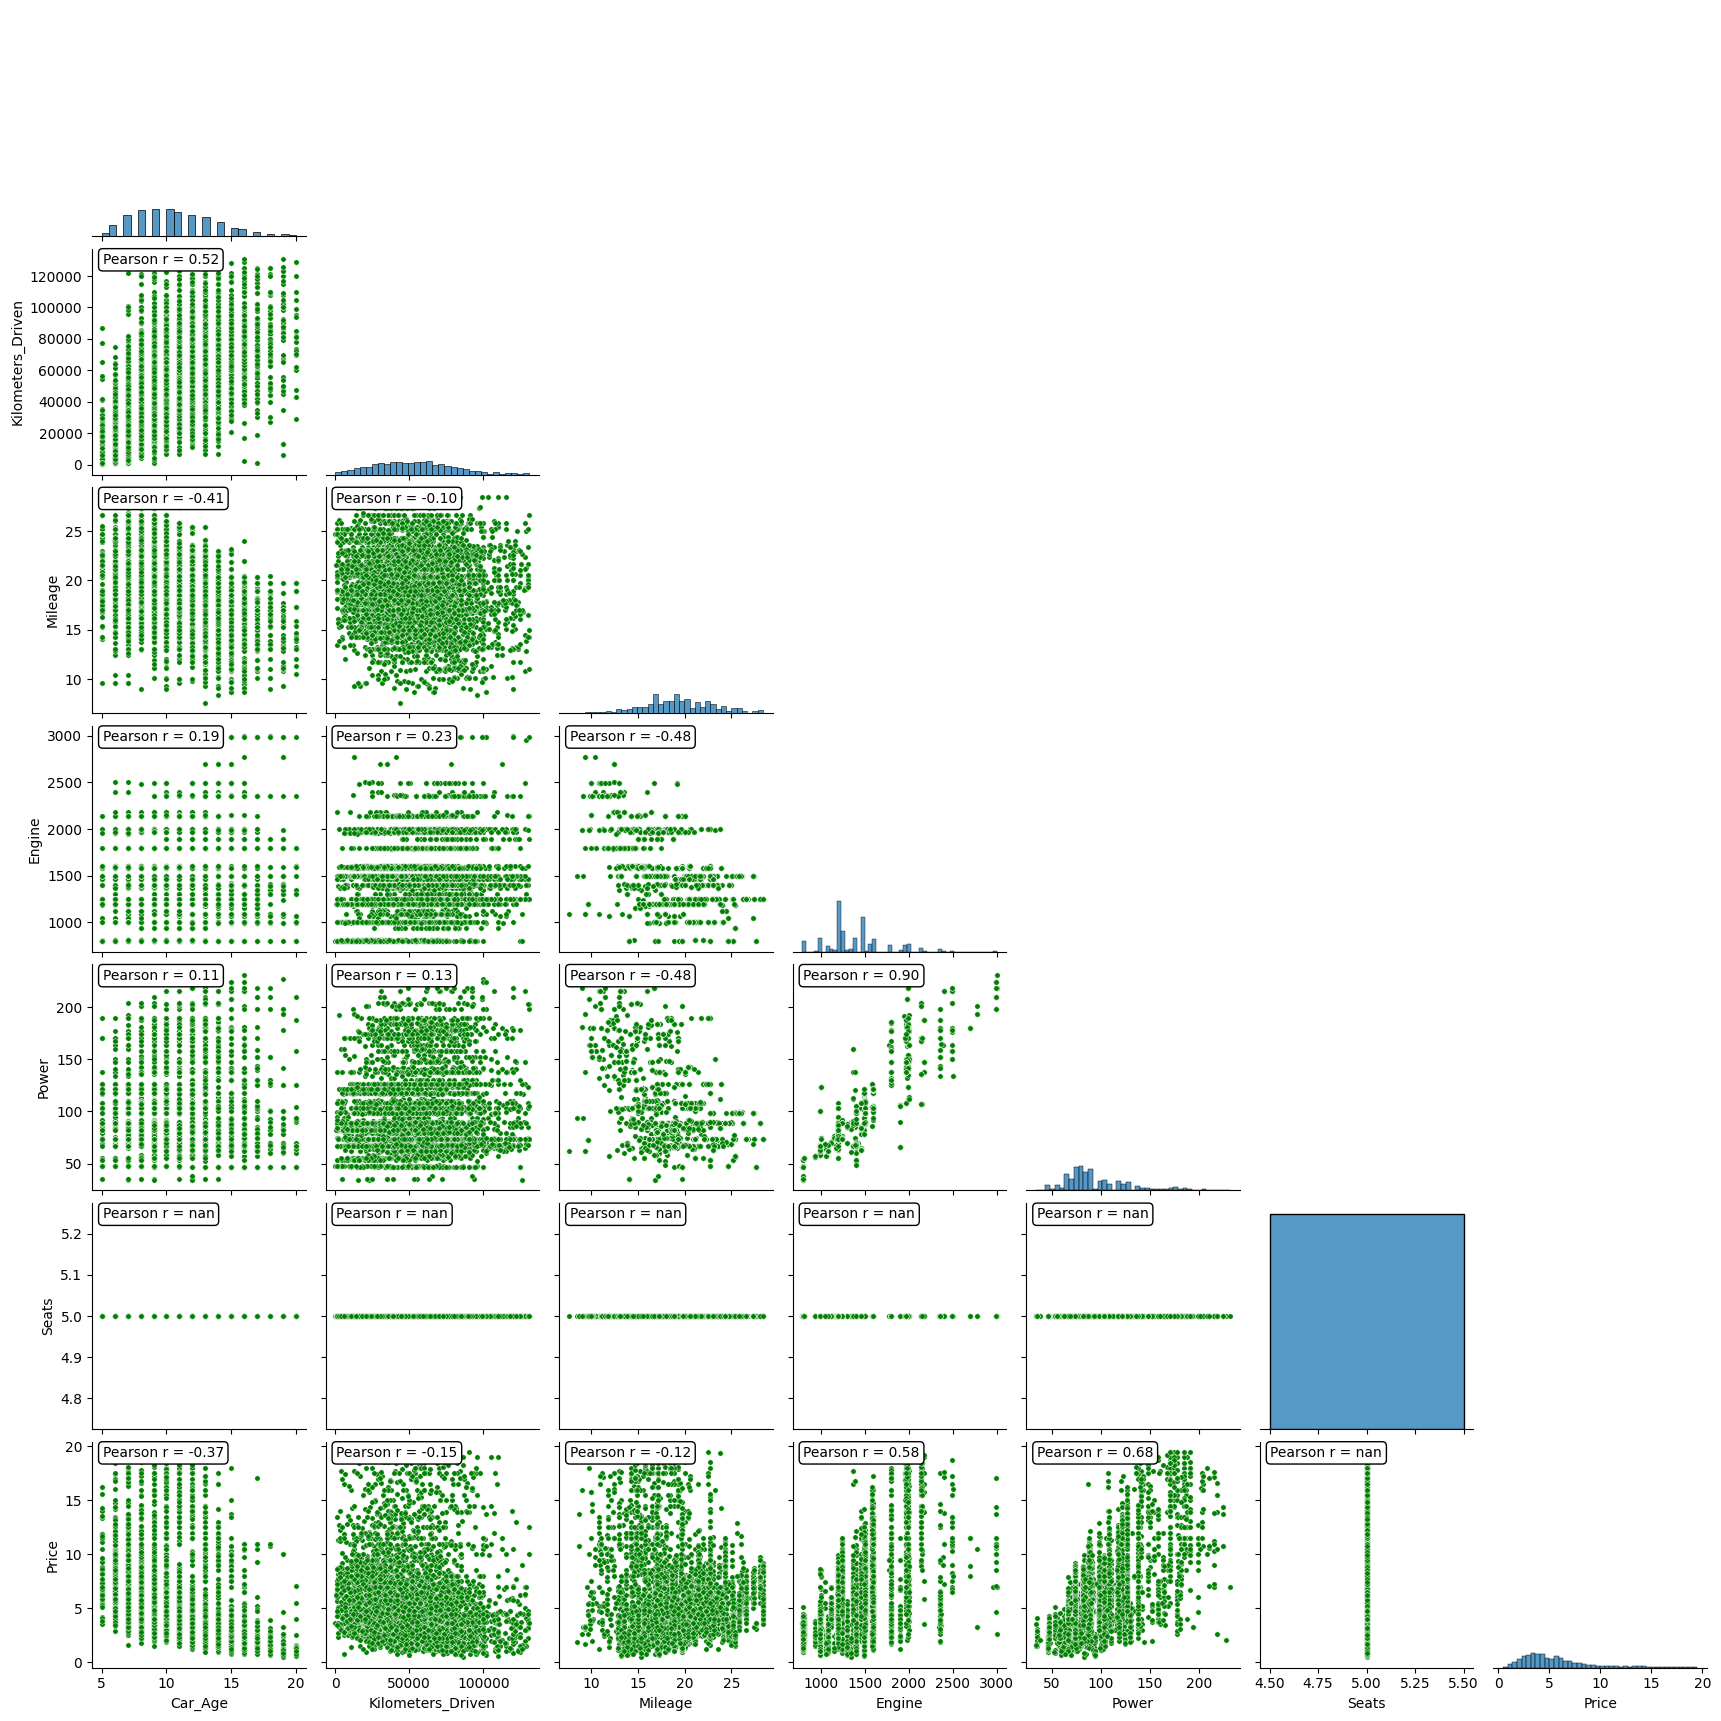

In [69]:
def add_correlation_coefficient(x, y, **kwargs):
    col1 = x.name
    col2 = y.name
    corr = correlation_matrix.loc[col1, col2]
    ax = plt.gca()
    ax.annotate(f'Pearson r = {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                fontsize=10, ha='left', va='center', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

pairplot = sns.pairplot(used_cars_cleaned[numerical_columns], kind='scatter', plot_kws={'s': 15, 'color': 'green'}, corner=True)
pairplot.map_lower(add_correlation_coefficient)

plt.show()

<font color='blue'>Looking at the scatter plots, we can see that the outlier treatment we performed has been effective. All the plots are concentrated rather than having a wide scatter of values. 

### <font color='purple'> 5. Handling missing values

#### <font color='purple'> There are missing values in the following columns: ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’. Please treat the outliers also as missing values. 

<font color='blue'> Check for missing Values in the df - Before treating outliers as missing values

In [70]:
used_cars.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                 175
Seats                  53
Price                1234
Car_Age                 0
dtype: int64

<font color='blue'> There were only 2 rows which had missing values in Mileage i.e for electric cars. The same had been solved above in Part 1. Now no missing values in Mileage. But since it is asked to consider to outliers as missing values, so mileage will have missing values after considering the same

In [71]:
used_cars_outliers_nan = used_cars.copy()

<font color='blue'> Replacing all outliers with NaN values as per requirement

In [72]:
numerical_columns = ['Mileage','Engine', 'Power', 'Seats', 'Price']

for column in numerical_columns:
    if column == 'Car_Age':  
        outliers = detect_outliers_zscore(used_cars_outliers_nan, column)
    else:  
        outliers = detect_outliers_iqr(used_cars_outliers_nan, column)
    
    used_cars_outliers_nan.loc[outliers, column] = np.nan

print("\nData after replacing outliers with NaN:")
print(used_cars_outliers_nan.head(10))

Mileage - IQR method: lower limit = 6.37, upper limit = 29.65
Engine - IQR method: lower limit = 43.00, upper limit = 3123.00
Power - IQR method: lower limit = -19.65, upper limit = 232.75
Seats - IQR method: lower limit = 5.00, upper limit = 5.00
Price - IQR method: lower limit = -6.17, upper limit = 19.62

Data after replacing outliers with NaN:
                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
5      Hyundai EON LPG Era Plus Option   Hyderabad  2012              75000   
6               Nissan Micra Diesel XV      Jaipur  2013              86999   
7    Toyota Innova

In [73]:
used_cars_outliers_nan.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                111
Power                 448
Seats                1206
Price                1952
Car_Age                 0
dtype: int64

<font color='blue'> As we can see, the number of missing values has increased significantly as we have considered all outliers as missing values.

#### <font color='purple'> Please count(print) missing values for each column in the columns of ‘Engine’, ‘Power’, and ‘Seats’. Please impute the missing values using subclass (subgroups). Please draw histogram for each column and use different color for the imputed missing values. 

In [74]:
print(f"Missing Values Including the outliers for Engine is: {used_cars_outliers_nan['Engine'].isna().sum()}")
print(f"Missing Values Including the outliers for Power is: {used_cars_outliers_nan['Power'].isna().sum()}")
print(f"Missing Values Including the outliers for Seats is: {used_cars_outliers_nan['Seats'].isna().sum()}")

Missing Values Including the outliers for Engine is: 111
Missing Values Including the outliers for Power is: 448
Missing Values Including the outliers for Seats is: 1206


<font color='blue'> For subclass, we have to have brands and Model groups. This will be done from Name column

In [75]:
used_cars_outliers_nan.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,16.97,998.0,58.16,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,NaN,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,11


<font color='blue'> Creating two new features Brand and Model

In [76]:
used_cars_outliers_nan[['Brand', 'Model']] = used_cars_outliers_nan['Name'].str.split(n =1, expand = True)

In [77]:
used_cars_outliers_nan.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,16.97,998.0,58.16,5.0,1.75,14,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,9,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,13,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,NaN,6.00,12,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,11,Audi,A4 New 2.0 TDI Multitronic


In [78]:
used_cars_outliers_nan[['Brand', 'Model']]

,Brand,Model
0,Maruti,Wagon R LXI CNG
1,Hyundai,Creta 1.6 CRDi SX Option
2,Honda,Jazz V
3,Maruti,Ertiga VDI
4,Audi,A4 New 2.0 TDI Multitronic
...,...,...
7248,Volkswagen,Vento Diesel Trendline
7249,Volkswagen,Polo GT TSI
7250,Nissan,Micra Diesel XV
7251,Volkswagen,Polo GT TSI


<font color='blue'> Find the unique values so that there is no anomalies in data in order to sub-group accurately

In [79]:
used_cars_outliers_nan['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

<font color='blue'> We see there are inconsistencies in brand name, to correct them we can make use of dictionary

In [80]:
brand_mapping = {
    'Land': 'Land Rover',
    'Mini': 'Mini Cooper',
    'ISUZU': 'Isuzu',
    'Hindustan': 'Hindustan',
    'OpelCorsa': 'Opel'
}

used_cars_outliers_nan['Brand'] = used_cars_outliers_nan['Brand'].apply(lambda x: brand_mapping.get(x, x))

unique_brands = used_cars_outliers_nan['Brand'].unique()
print("Unique Brands:", unique_brands)

Unique Brands: ['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land Rover' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra'
 'Ford' 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda'
 'Mini Cooper' 'Fiat' 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'Force'
 'Bentley' 'Lamborghini' 'Hindustan' 'Opel']


<font color='blue'> Let's look for the Model column same way

In [81]:
# Unique Models- will be so many
used_cars_outliers_nan['Model'].unique()

array(['Wagon R LXI CNG', 'Creta 1.6 CRDi SX Option', 'Jazz V', ...,
       'EcoSport 1.5 Petrol Ambiente', 'Compass 1.4 Sport',
       'Elite i20 Magna Plus'], dtype=object)

In [82]:
used_cars_outliers_nan['Model'].nunique()

2041

<font color='blue'> These are many unique values for model, it won't help while creating subclasses or groups. Modifying model column to have only first two words for better grouping.

In [83]:
used_cars_outliers_nan['Model'] = used_cars_outliers_nan['Model'].apply(lambda x: ' '.join(x.split()[:2]))

In [84]:
used_cars_outliers_nan.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,16.97,998.0,58.16,5.0,1.75,14,Maruti,Wagon R
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,9,Hyundai,Creta 1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,13,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,NaN,6.00,12,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,11,Audi,A4 New


<font color='blue'> Group by 'Brand', 'Model', 'Fuel_Type', 'Transmission' and count the entries

In [85]:
grouped1 = used_cars_outliers_nan.groupby(['Brand', 'Model']).size().reset_index(name='Count')

display(grouped1)

sorted_grouped1 = grouped1.sort_values(by='Count', ascending=False)
print("\nSorted Grouped Data:")
display(sorted_grouped1)

,Brand,Model,Count
0,Ambassador,Classic Nova,1
1,Audi,A3 35,6
2,Audi,A4 1.8,3
3,Audi,A4 2.0,56
4,Audi,A4 3.0,5
...,...,...,...
722,Volvo,V40 Cross,3
723,Volvo,V40 D3,2
724,Volvo,XC60 D4,3
725,Volvo,XC60 D5,4



Sorted Grouped Data:


,Brand,Model,Count
429,Maruti,Swift Dzire,189
217,Hyundai,Grand i10,179
447,Maruti,Wagon R,178
676,Toyota,Innova 2.5,145
234,Hyundai,Verna 1.6,127
...,...,...,...
394,Maruti,Esteem LX,1
387,Maruti,Ertiga LXI,1
386,Maruti,Eeco Smiles,1
385,Maruti,Eeco CNG,1


<font color='blue'> Group by 'Brand', 'Model', 'Fuel_Type', 'Transmission' and count the entries

In [86]:
grouped = used_cars_outliers_nan.groupby(['Brand', 'Model', 'Fuel_Type', 'Transmission']).size().reset_index(name='Count')

display(grouped)

sorted_grouped = grouped.sort_values(by='Count', ascending=False)
print("\nSorted Grouped Data:")
display(sorted_grouped)

,Brand,Model,Fuel_Type,Transmission,Count
0,Ambassador,Classic Nova,Diesel,Manual,1
1,Audi,A3 35,Diesel,Automatic,6
2,Audi,A4 1.8,Petrol,Automatic,3
3,Audi,A4 2.0,Diesel,Automatic,55
4,Audi,A4 2.0,Petrol,Automatic,1
...,...,...,...,...,...
953,Volvo,V40 D3,Diesel,Automatic,2
954,Volvo,XC60 D4,Diesel,Automatic,3
955,Volvo,XC60 D5,Diesel,Automatic,4
956,Volvo,XC90 2007-2015,Diesel,Automatic,1



Sorted Grouped Data:


,Brand,Model,Fuel_Type,Transmission,Count
894,Toyota,Innova 2.5,Diesel,Manual,145
591,Maruti,Wagon R,Petrol,Manual,131
567,Maruti,Swift Dzire,Diesel,Manual,118
291,Hyundai,Grand i10,Petrol,Manual,104
216,Honda,City 1.5,Petrol,Manual,100
...,...,...,...,...,...
680,Nissan,Micra XV,Diesel,Manual,1
257,Hyundai,Accent Executive,CNG,Manual,1
678,Nissan,Micra XL,Petrol,Automatic,1
677,Nissan,Micra XE,Petrol,Manual,1


<font color='blue'> <b>Start imputing the values using Subclass and sub-groups using a combinations of features

In [87]:
used_cars_outliers_nan_imputed = used_cars_outliers_nan.copy()

In [88]:
used_cars_outliers_nan_imputed.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                111
Power                 448
Seats                1206
Price                1952
Car_Age                 0
Brand                   0
Model                   0
dtype: int64

<font color='blue'> <b> Note: </b> As per my understanding we should be using median to do imputation on engine and power as our data is highly skewed and doesn't follow the normal distribution. So in such scenarios median is better suited as its robust to outliers and skewed data. However, as per requirement, it is mentioned to use Mean. Mean ideally should be used when the data is normally distributed, however, I'm going as per requirements outlined. 

<font color='blue'><b>Reasons why I think median should be used, however, we will still use mean.</b>

<font color='blue'>Using median for imputation is always advisable over mode or mean for various reasons:

1.  <b> <font color='blue'> Robustness to outliers </b>: Median is less affected by outliers as compared to mean.
2.  <b><font color='blue'>Skewed distributions</b>: Median better represents skewed distributions. As we have seen with our analysis, most of the fields were having non-normal distrubutions and were heavily skewed. 
3.  <b><font color='blue'>Non-normal data</b>: Median is suitable for non-normal data and as most of our fields had non-normal distributions, it is more suitable. 
4.  <b><font color='blue'>Preserves data distribution</b>: Imputation with median helps to preserves the original data distribution.


<font color='blue'>For Seats I will be using Mode as its discrete and it had only 9 unique values. However, after outlier removal, it was reduced to 1 unique value of 5.

<font color='blue'><b> Impute using mean/mode for Sub-Group: Brand, Model, Fuel-Type, Transmission

In [89]:
for column in ['Engine', 'Power']:
    used_cars_outliers_nan_imputed[column] = used_cars_outliers_nan_imputed.groupby(['Brand', 'Model', 'Fuel_Type', 'Transmission'])[column].transform(
        lambda x: x if x.mean() is np.nan else x.fillna(x.mean())
    )

for column in ['Seats']:
    used_cars_outliers_nan_imputed[column] = used_cars_outliers_nan_imputed.groupby(['Brand', 'Model', 'Fuel_Type', 'Transmission'])[column].transform(
        lambda x: x if x.mode() is np.nan else x.fillna(x.mode())
    )

In [90]:
used_cars_outliers_nan_imputed.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 70
Power                 278
Seats                1206
Price                1952
Car_Age                 0
Brand                   0
Model                   0
dtype: int64

<font color='blue'> We see a good reduction in missing values for Engine & Power, however, no change to the Seats fields. However, we still have a significant number, so making the groups more concise. 

<font color='blue'><b>Impute using mean/mode for Sub-Group: Brand, Model, Fuel-Type

In [91]:
for column in ['Engine', 'Power']:
    used_cars_outliers_nan_imputed[column] = used_cars_outliers_nan_imputed.groupby(['Brand', 'Model', 'Fuel_Type'])[column].transform(
        lambda x: x if x.mean() is np.nan else x.fillna(x.mean())
    )

for column in ['Seats']:
    used_cars_outliers_nan_imputed[column] = used_cars_outliers_nan_imputed.groupby(['Brand', 'Model', 'Fuel_Type'])[column].transform(
        lambda x: x if x.mode() is np.nan else x.fillna(x.mode())
    )

In [92]:
used_cars_outliers_nan_imputed.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 70
Power                 275
Seats                1206
Price                1952
Car_Age                 0
Brand                   0
Model                   0
dtype: int64

<font color='blue'> We see a virtually no reduction in missing values for Engine, Power and Seats fields. Making the groups smaller.

<font color='blue'><b>Impute using mean/mode for Sub-Group: Brand, Model

In [93]:
for column in ['Engine', 'Power']:
    used_cars_outliers_nan_imputed[column] = used_cars_outliers_nan_imputed.groupby(['Brand', 'Model'])[column].transform(
        lambda x: x if x.mean() is np.nan else x.fillna(x.mean())
    )

for column in ['Seats']:
    used_cars_outliers_nan_imputed[column] = used_cars_outliers_nan_imputed.groupby(['Brand', 'Model'])[column].transform(
        lambda x: x if x.mode() is np.nan else x.fillna(x.mode())
    )

In [94]:
used_cars_outliers_nan_imputed.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 62
Power                 273
Seats                1206
Price                1952
Car_Age                 0
Brand                   0
Model                   0
dtype: int64

<font color='blue'> Again, we see a virtually no reduction in missing values for Engine, Power and Seats fields. We are not able to impute a lot of values with given combinations, using other combinations within Subclass.

<font color='blue'><b>Impute using mean/mode for Sub-Group: Brand, Engine


In [95]:
for column in ['Engine', 'Power']:
    used_cars_outliers_nan_imputed[column] = used_cars_outliers_nan_imputed.groupby(['Brand', 'Engine'])[column].transform(
        lambda x: x if x.mean() is np.nan else x.fillna(x.mean())
    )

for column in ['Seats']:
    used_cars_outliers_nan_imputed[column] = used_cars_outliers_nan_imputed.groupby(['Brand', 'Engine'])[column].transform(
        lambda x: x if x.mode() is np.nan else x.fillna(x.mode())
    )

In [96]:
used_cars_outliers_nan_imputed.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 62
Power                 124
Seats                1211
Price                1952
Car_Age                 0
Brand                   0
Model                   0
dtype: int64

<font color='blue'> We see some reduction in Power, however, still not siginificant enough as lot of sub-groups are having NaN values for all rows. So there is no way to calculate the Mean or Mode for the subgroup. As a result we don't see any changes to Engine and Seats fields.

<font color='blue'><b> So we will use the mean/mode directly with the Brand column to cover as many missing values as we can.

In [97]:
for column in ['Engine', 'Power']:
    used_cars_outliers_nan_imputed[column] = used_cars_outliers_nan_imputed.groupby(['Brand'])[column].transform(
        lambda x: x if x.mean() is np.nan else x.fillna(x.mean())
    )

for column in ['Seats']:
    used_cars_outliers_nan_imputed[column] = used_cars_outliers_nan_imputed.groupby(['Brand'])[column].transform(
        lambda x: x if x.mode() is np.nan else x.fillna(x.mode())
    )

In [98]:
used_cars_outliers_nan_imputed.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                  3
Power                  24
Seats                1211
Price                1952
Car_Age                 0
Brand                   0
Model                   0
dtype: int64

<font color='blue'> We covered a lot of missing values using the mean at Brand level for Engine and Power fields. However, we can still see few missing values for all three fields. We will now use global constants to impute.

<font color='blue'><b> Instead of hardcoding some random value, we will use the mean to define the global contants and use that to fill the remaining missing values for Engine, Power and Seats fields. For Seats also we have decided to use mean for Global constant as the only unique value for this column is 5, so mean will also be 5.

In [99]:
global_engine_avg = used_cars_outliers_nan_imputed['Engine'].mean()
global_power_avg = used_cars_outliers_nan_imputed['Power'].mean()
global_seats_avg = used_cars_outliers_nan_imputed['Seats'].mean()

used_cars_outliers_nan_imputed['Engine'].fillna(global_engine_avg, inplace=True)
used_cars_outliers_nan_imputed['Power'].fillna(global_power_avg, inplace=True)
used_cars_outliers_nan_imputed['Seats'].fillna(global_seats_avg, inplace=True)

/var/folders/f9/tzl1jwjn3f3fvhyb_dm77j6h0000gn/T/ipykernel_28990/2751595901.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  used_cars_outliers_nan_imputed['Engine'].fillna(global_engine_avg, inplace=True)
/var/folders/f9/tzl1jwjn3f3fvhyb_dm77j6h0000gn/T/ipykernel_28990/2751595901.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

<font color='blue'> Plotting histograms to show a comparison between non-imputed and imputed values for Engine, Seats and Power fields.

In [100]:
df1 = used_cars_outliers_nan.copy()
df2 = used_cars_outliers_nan_imputed.copy()

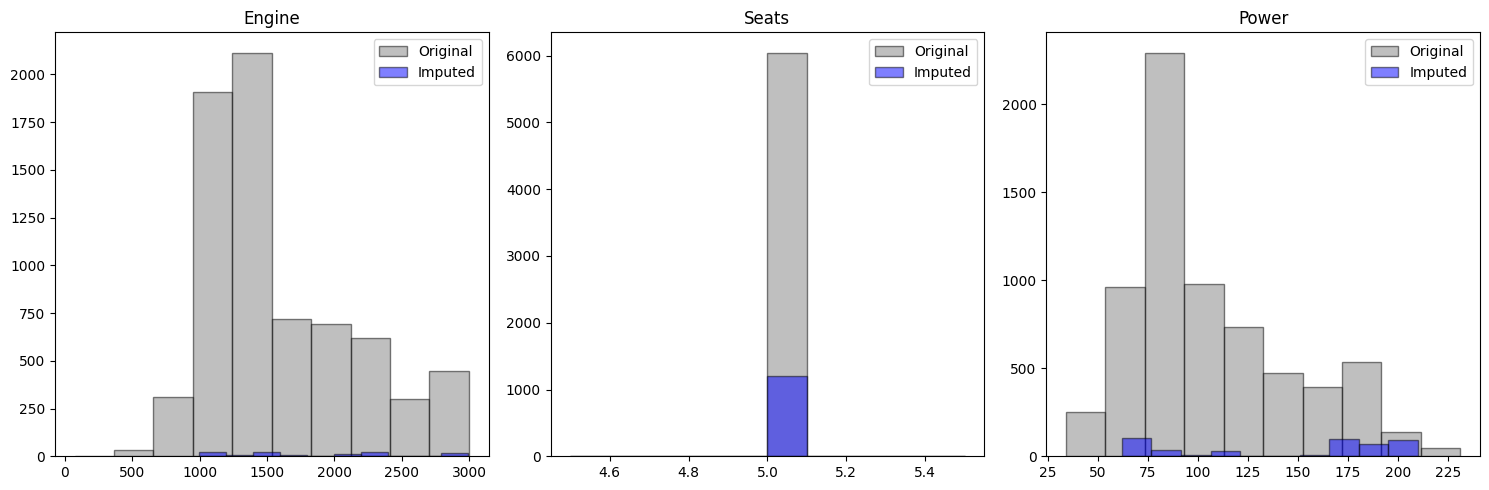

In [101]:
imputed_engine = df2['Engine'].notna() & df1['Engine'].isna()
imputed_seats = df2['Seats'].notna() & df1['Seats'].isna()
imputed_power = df2['Power'].notna() & df1['Power'].isna()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(df2['Engine'][~imputed_engine], alpha=0.5, label='Original', edgecolor='black', color='grey')
axs[0].hist(df2['Engine'][imputed_engine], alpha=0.5, label='Imputed', edgecolor='black', color='blue')
axs[0].set_title('Engine')
axs[0].legend()

axs[1].hist(df2['Seats'][~imputed_seats], alpha=0.5, label='Original', edgecolor='black', color='grey')
axs[1].hist(df2['Seats'][imputed_seats], alpha=0.5, label='Imputed', edgecolor='black', color='blue')
axs[1].set_title('Seats')
axs[1].legend()

axs[2].hist(df2['Power'][~imputed_power], alpha=0.5, label='Original', edgecolor='black', color='grey')
axs[2].hist(df2['Power'][imputed_power], alpha=0.5, label='Imputed', edgecolor='black', color='blue')
axs[2].set_title('Power')
axs[2].legend()

plt.tight_layout()
plt.show()

In [102]:
used_cars_outliers_nan_imputed.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                  0
Power                   0
Seats                   0
Price                1952
Car_Age                 0
Brand                   0
Model                   0
dtype: int64

<font color='blue'> Missing Values for Engine, Power and seats have been imputed, and we no more missing values in these columns

 #### <font color='purple'> Please count(print) missing values for each column in the columns of ‘Mileage’ and ‘Price’. Please impute the missing values using linear regression.Please draw histogram for each column and use different color for the imputed missing values 

In [103]:
print(f"Missing Values Including the outliers for Engine is: {used_cars_outliers_nan_imputed['Mileage'].isna().sum()}")
print(f"Missing Values Including the outliers for Power is: {used_cars_outliers_nan_imputed['Price'].isna().sum()}")

Missing Values Including the outliers for Engine is: 83
Missing Values Including the outliers for Power is: 1952


<font color='blue'> Since Imputation was done for missing values, finding co-relation matrix again 

In [104]:
numerical_columns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

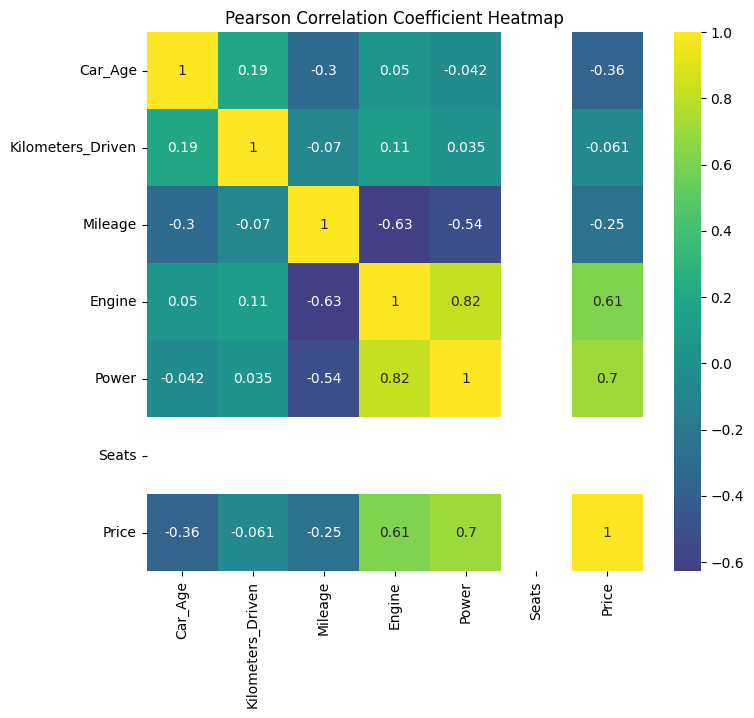

In [105]:
correlation_matrix = used_cars_outliers_nan_imputed[numerical_columns].corr()

plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0)
plt.title('Pearson Correlation Coefficient Heatmap')
plt.show()

<font color='blue'> Based on the above we see Engine and Power have a strong positive correlation with Price. Also, no fields have a strong correlation to Mileage, however, Kilometers_driven is the closest to a positive correlation value. So we will use the same for training our Linear Regression Models.

<font color='blue'><b> Performing Linear Regression to Impute missing values for the Price Column

In [106]:
price_features = ['Engine', 'Power']
price_target = 'Price'

price_train = used_cars_outliers_nan_imputed[used_cars_outliers_nan_imputed['Price'].notnull()]
price_test = used_cars_outliers_nan_imputed[used_cars_outliers_nan_imputed['Price'].isnull()]

X_train_price = price_train[price_features]
y_train_price = price_train[price_target]
X_test_price = price_test[price_features]

In [107]:
price_model = LinearRegression()
price_model.fit(X_train_price, y_train_price)

price_predictions = price_model.predict(X_test_price)

used_cars_outliers_nan_imputed.loc[used_cars_outliers_nan_imputed['Price'].isnull(), 'Price'] = price_predictions

In [108]:
used_cars_outliers_nan_imputed.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage              83
Engine                0
Power                 0
Seats                 0
Price                 0
Car_Age               0
Brand                 0
Model                 0
dtype: int64

<font color='blue'> Missing values for Price field were imputed and no missing values remain. Performing similar imputation on the Mileage field as well.

In [109]:
mileage_features = ['Kilometers_Driven']
mileage_target = 'Mileage'

mileage_train = used_cars_outliers_nan_imputed[used_cars_outliers_nan_imputed['Mileage'].notnull()]
mileage_test = used_cars_outliers_nan_imputed[used_cars_outliers_nan_imputed['Mileage'].isnull()]

X_train_mileage = mileage_train[mileage_features]
y_train_mileage = mileage_train[mileage_target]
X_test_mileage = mileage_test[mileage_features]

In [110]:
mileage_model = LinearRegression()
mileage_model.fit(X_train_mileage, y_train_mileage)

mileage_predictions = mileage_model.predict(X_test_mileage)

used_cars_outliers_nan_imputed.loc[used_cars_outliers_nan_imputed['Mileage'].isnull(), 'Mileage'] = mileage_predictions

In [111]:
used_cars_outliers_nan_imputed.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Car_Age              0
Brand                0
Model                0
dtype: int64

<font color='blue'> All the missing values have been imputed as can be seen above using a variety of methods.

<font color='blue'> Plotting histogram for imputed and non-imputed values for Mileage and Price

In [112]:
df1_1 = used_cars_outliers_nan.copy()
df2_1 = used_cars_outliers_nan_imputed.copy()

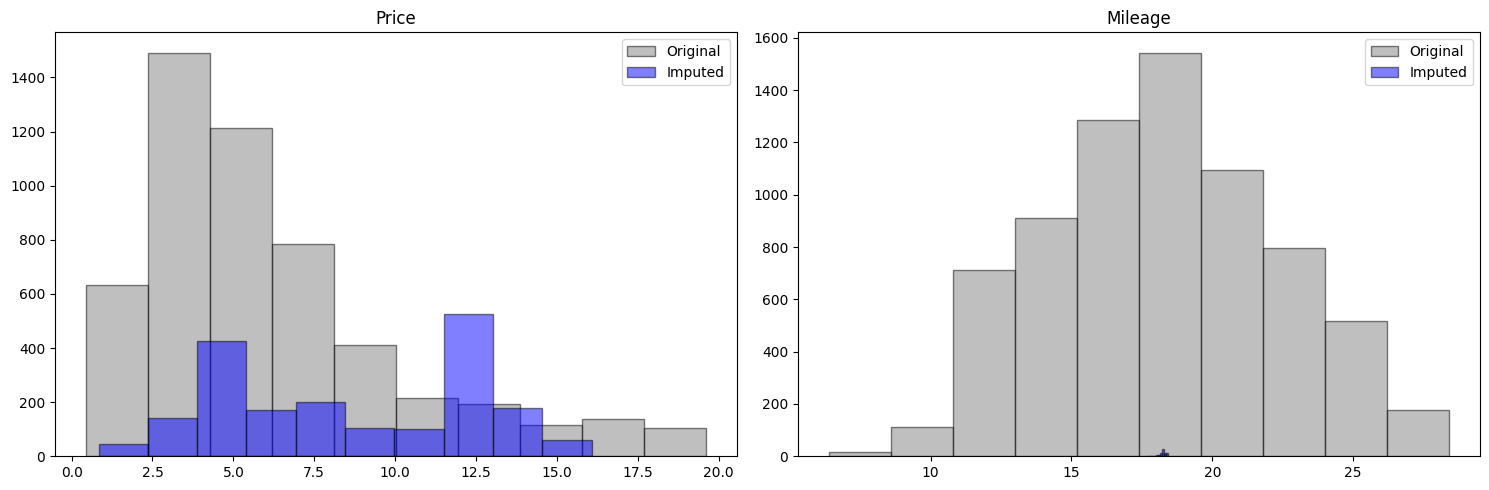

In [113]:
imputed_price = df2_1['Price'].notna() & df1_1['Price'].isna()
imputed_mileage = df2_1['Mileage'].notna() & df1_1['Mileage'].isna()

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].hist(df2_1['Price'][~imputed_price], alpha=0.5, label='Original', edgecolor='black', color='grey')
axs[0].hist(df2_1['Price'][imputed_price], alpha=0.5, label='Imputed', edgecolor='black', color='blue')
axs[0].set_title('Price')
axs[0].legend()

axs[1].hist(df2_1['Mileage'][~imputed_mileage], alpha=0.5, label='Original', edgecolor='black', color='grey')
axs[1].hist(df2_1['Mileage'][imputed_mileage], alpha=0.5, label='Imputed', edgecolor='black', color='blue')
axs[1].set_title('Mileage')
axs[1].legend()

plt.tight_layout()
plt.show()


### <font color='purple'> Thank You !